# LENDING CLUB CASE STUDY

#### Business Understanding:

Being an employee at consumer finance company which specialises in lending various types of loans to urban customers, the company has to make a decision for loan approval based on the applicant’s profile when the company receives a loan application.
<br>
Two types of risks are associated with the bank’s decision:
1. If the applicant is <b>likely</b> to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is <b>not likely</b> to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

#### Business Objective:

The company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.<br><b>  The company can utilise this knowledge for its portfolio and risk assessment.</b>

## Checkpoint 1: Datasourcing and Understanding the Dataset

In [159]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import datetime as dt
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

The source of data for this case study is provided by UpGrad as part of the assignment/case study. Import the dataset from CSV file

In [160]:
loan = pd.read_csv("loan.csv")

Understand the Data:

In [161]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Seems like some columns are being hidden, let's take a look at the shape of the dataframe to understand the column and row size.

In [162]:
loan.shape

(39717, 111)

Clearly there are more number of coulmns. Let's take a look at all the columns present in the imported loan dataframe

In [163]:
pd.set_option('max_columns', None)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

From an overview, a lot of columns just seem to have null/NaNs. Let's try to understand the data types of each of these columns before we proceed with data cleaning:

In [164]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

A lot of columns don't seem to have the correct data type. I see object for columns like last_pymnt_date, int_rate and many others. Let's first start by cleaning the data and then proceeding with fixing the data type.

## Checkpoint 2: Data Cleaning

<b>
1. Fix Rows and Columns</b>:

Let's start the data cleaning process by dropping columns and rows that have more than 80% of data as 'Null/NaN'.
<br><br>
First, let's take a look at the number of columns that have more than 80% data as NaN/Null.

In [165]:
loan.loc[:,((loan.isnull().sum()/len(loan.index))*100)>80]

,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Jun-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen in the table above there are 56 columns that have more than 80% null values. These are of no importance for us in our datacleaning process. Hence we can go ahead and drop it straightforward.

In [166]:
#Pass the columns of the above obtainied dataframe into drop function and store it back into the dataframe
loan = loan.drop(loan.loc[:,((loan.isnull().sum()/len(loan.index))*100)>80].columns[:],axis=1)

Let's look at the shape of the loan dataframe to understand the remaining columns:

In [167]:
loan.shape

(39717, 55)

Now, let's also check for any rows containting more than 80% of Nulls/NaNs

In [168]:
#There were no results observed for more than 80% Nulls/NaNs, hence chekcing if there are atleast more than 10% of nulls
loan.loc[((loan.isnull().sum(axis=1)/len(loan.index))*100)>10,:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


There are none. That's a relief. Let's take a look at the max percentage of nulls across rows:

In [169]:
((loan.isnull().sum(axis=1)/len(loan.index))*100).sort_values(ascending=False)

39659    0.015107
39714    0.015107
39660    0.015107
39715    0.015107
39704    0.012589
           ...   
9444     0.000000
32489    0.000000
9439     0.000000
9438     0.000000
30454    0.000000
Length: 39717, dtype: float64

There is a max of only 0.01% of null values across rows. Hence straight forward drop of rows is not requried. 

###### Checklist for Fixing Rows:
* Delete summary rows: Total, Subtotal rows
* Delete incorrect rows: Header rows, Footer rows
* Delete extra rows: Column number, indicators, Blank rows, Page No.

Let us look at the head and tail of the dataframe to understand if there are any summary rows, incorrect rows:

In [170]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [171]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,11.0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Let us check for rows with less than 15 unique values indicating that particular row is an extra row

In [172]:
loan[loan.nunique(axis=1)<15]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


There are no extra rows either. Thus all our checkpoints for rows are covered and found negative. Let's move on to checkpoints for columns.

###### Checklist for Fixing Columns:
* Delete columns: Delete unnecessary columns
* Merge columns for creating unique identifiers if needed: E.g. Merge State, City into Full address
* Add column names: Add column names if missing
* Rename columns consistently: Abbreviations, encoded columns
* Align misaligned columns: Dataset may have shifted columns

Let's start by deleting unnecessary columns. Columns with only 1 value is of no use for our current analysis. Let's look at these column names:

In [173]:
loan.nunique(axis=0)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

Let's go ahead and drop these cloumns. 

In [174]:
loan = loan.drop(loan.loc[:,loan.nunique(axis=0)<2].columns,axis=1)

Let's look at the data present in other columns which have single digit unique values to understand if they have useful data:

In [175]:
loan.loc[:,loan.nunique(axis=0)<10]

,term,grade,home_ownership,verification_status,loan_status,inq_last_6mths,pub_rec,pub_rec_bankruptcies
0,36 months,B,RENT,Verified,Fully Paid,1,0,0.0
1,60 months,C,RENT,Source Verified,Charged Off,5,0,0.0
2,36 months,C,RENT,Not Verified,Fully Paid,2,0,0.0
3,36 months,C,RENT,Source Verified,Fully Paid,1,0,0.0
4,60 months,B,RENT,Source Verified,Current,0,0,0.0
...,...,...,...,...,...,...,...,...
39712,36 months,A,MORTGAGE,Not Verified,Fully Paid,0,0,NaN
39713,36 months,C,RENT,Not Verified,Fully Paid,1,0,NaN
39714,36 months,A,MORTGAGE,Not Verified,Fully Paid,0,0,NaN
39715,36 months,A,MORTGAGE,Not Verified,Fully Paid,0,0,NaN


From the above table it looks like every column apart from pub_rec and pub_rec_bankruptcies have useful information for our analysis. Let's take a look at the unique values present in these 2 columns

In [176]:
print(loan.pub_rec.unique())
print(loan.pub_rec_bankruptcies.unique())

[0 1 2 3 4]
[ 0.  1.  2. nan]


From the above command it looks like that these 2 columns also have unique information. Let's try to understand the percentage of the unique values

In [177]:
loan.pub_rec_bankruptcies.describe(percentiles = [0.9,0.95,0.99,0.9999])

count     39020.000000
mean          0.043260
std           0.204324
min           0.000000
50%           0.000000
90%           0.000000
95%           0.000000
99%           1.000000
99.99%        2.000000
max           2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [178]:
loan.pub_rec.describe(percentiles = [0.9,0.95,0.96])

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
50%          0.000000
90%          0.000000
95%          1.000000
96%          1.000000
max          4.000000
Name: pub_rec, dtype: float64

Both the columns have 95% values as 0. Let's go ahead and drop public_rec_bankruptcies and pub_rec

In [179]:
loan = loan.drop('pub_rec_bankruptcies',axis=1)
loan = loan.drop('pub_rec',axis=1)

In [180]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


We can also notice that there are 3 unique identifiers in the data set above, these are:
1. id
2. member_id
3. url
<br>

Before we make any decisions of dropping any of the columns, let's check the URL columns to see if there is any information that can be derived from them:

In [181]:
loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=423544     1
https://lendingclub.com/browse/loanDetail.action?loan_id=680000     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1009492    1
https://lendingclub.com/browse/loanDetail.action?loan_id=516611     1
https://lendingclub.com/browse/loanDetail.action?loan_id=259505     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=853105     1
https://lendingclub.com/browse/loanDetail.action?loan_id=632676     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1036932    1
https://lendingclub.com/browse/loanDetail.action?loan_id=706823     1
https://lendingclub.com/browse/loanDetail.action?loan_id=655822     1
Name: url, Length: 39717, dtype: int64

The only information that can be derived is the loan id which is already provided in the dataset, hence this will not be of much use for our analysis. For our current analysis, all these 3 columns add no value

In [182]:
loan = loan.drop(['member_id','url','id'],axis = 1)

We also notice that funded_amnt does not serve much purpose as funded_amnt_inv describes the actual that the investors have lended to the borrower. hence let's also drop funded_amnt column

In [183]:
loan = loan.drop(['funded_amnt'],axis = 1)

In [184]:
loan.shape

(39717, 40)

Now that we have deleted most of the unnecessary columns to the best of our knowledge, let's proceed with remaining checkpoints:
<br>
* Merge columns for creating unique identifiers if needed - <b>There is no need for merging columns as the data in each column is discrete and satisfactory for current analysis </b>
* Add column names if missing : <b>Didn't observe any columns missing names in current data set and hence can be ignored in current scenario</b> 
* Rename columns consistently: Abbreviations, encoded columns
<br><b>There are some columns that can be renamed:
    1. emp_title -> employer_company
    2. dti -> debt_to_inc
    3. earliest_cr_line -> first_cr_line_mth</b>

In [185]:
loan.rename(columns={'emp_title':'employer_company','dti':'debt_to_inc','earliest_cr_line':'first_cr_line_mth'}, inplace=True)

* Align misaligned columns:<b> To findout if there are any misalligned columns or not, columns need ot have the correct data type. To do that we'd have to take a deeper look at the values of the data present in the columns of dataframe which we can do while standardising the values.</b>

<b>2. Fix missing values</b>
<br><br>
Let's take a look at the percentage of null values across columns to understand if there is any amount of missing data treatment required.

In [186]:
((loan.isnull().sum()/len(loan.index))*100).sort_values(ascending=False)

mths_since_last_delinq     64.662487
desc                       32.580507
employer_company            6.191303
emp_length                  2.706650
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
grade                       0.000000
sub_grade                   0.000000
installment                 0.000000
zip_code                    0.000000
home_ownership              0.000000
annual_inc                  0.000000
int_rate                    0.000000
verification_status         0.000000
issue_d                     0.000000
term                        0.000000
loan_status                 0.000000
funded_amnt_inv             0.000000
purpose                     0.000000
debt_to_inc                 0.000000
addr_state                  0.000000
last_pymnt_amnt             0.000000
collection_recovery_fee     0.000000
recoveries                  0.000000
total_rec_late_fee          0.000000
t

Looking at the results obtained above, missing data in every column looks to be within 10% apart from desc and mths_since_last_delinq columns. Let's take a look at these columns to take appropriate decision

In [187]:
loan.desc.tail(20)

39697    Seven months ago I decided to drop everything ...
39698                         To pay off credit card debt.
39699    I am art educator and would like to use the lo...
39700    The main purpose of this loan is for college e...
39701    Pay off higher rate credit card debt. It is a ...
39702    Bank of America increased my interest rate fro...
39703    I bought a few months ago a cool duplex in the...
39704    I started baking rolls and breads for family a...
39705    This is a loan to help pay for other education...
39706                    Need a loan to remodel my kitchen
39707            Need a loan to make some home improvments
39708    I would like to pay off my high-interest credi...
39709                                                  NaN
39710                                                  NaN
39711    I'd like to shift some credit card debt so it ...
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr.

This looks to be description of the loan. This will not be very helpful in our analysis. Let's look at the mths_since_last_delinq column

In [188]:
loan.mths_since_last_delinq.head(30)

0      NaN
1      NaN
2      NaN
3     35.0
4     38.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    61.0
17     NaN
18     8.0
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27    20.0
28    18.0
29     NaN
Name: mths_since_last_delinq, dtype: float64

Looking at the values above this column seems to hold values of the number of months since the applicant last defaulted. This might have been useful for our analysis but with more than 60% null values, this column is not of very much use for our analysis. Imputing mean or median may exaggerate the data in this situation which we don't want.
<br><br>
Hence let us go ahead and drop these 2 columns

In [189]:
loan = loan.drop('desc',axis = 1)
loan = loan.drop('mths_since_last_delinq',axis = 1)

In [190]:
loan.shape

(39717, 38)

Coming to the missing values in other columns, they can be imputed with either mean or median if it is a numeric column or with mode if it is a categorical column. But since the amount of null values there is less than 10%, for our current analysis we can go ahead leave these null value as it is as there might be a risk of exaggerating the data while imputing the data. Let's filter data further and come back to fixing missing data in the end to minimise data loss/exaggeration.

<b>3. Invalid Values</b>

###### Checklist:
* Encode unicode properly
* Convert incorrect data types: Correct the incorrect data types to the correct data types for ease of analysis.
    - string to number: "12,300" to “12300”
    - string to date: "2013-Aug" to “2013/08”
    - number to string: “PIN Code 110001” to "110001"
* Correct values that go beyond range: If some of the values are beyond logical range. E.G. temperature less than -273° C (0° K).

From what we have observed till now, we have not encountered any special/junk characters indicating that we have loaded the csv with correct encoding. To be on safer side, let's look at the encoding of the csv file and see if the encoding is same as default encoding used by pandas (utf-8).

The following code has been made a markdown cell as executing this will take a lot of time, hence I have runit and recorded the result below:
###### CODE:
import chardet
<br>
#Check encoding<br>
with open("loan.csv", 'rb') as rawdata:<br>
&emsp;result = chardet.detect(rawdata.read())<br>
<br>
#check what the character encoding might be<br>
print(result)

###### RESULT:
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

From the above output it is clear that there is no encoding mismatch

To correct the datatypes, let's take a look at the column names that have object datatypes

In [191]:
object_columns = [column for column in loan.columns if loan[column].dtype == 'object']
print(loan.loc[:,object_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   employer_company     37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  purpose              39717 non-null  object
 11  title                39706 non-null  object
 12  zip_code             39717 non-null  object
 13  addr_state           39717 non-null  object
 14  first_cr_line_mth    39717 non-null  object
 15  revol_util           39667 non-null  object
 16  last

Let's look at some data present in these columns

In [192]:
loan.loc[:,object_columns]

,term,int_rate,grade,sub_grade,employer_company,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,first_cr_line_mth,revol_util,last_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,Feb-96,21%,Jan-15,Apr-16
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,other,Personal,972xx,OR,Jan-96,53.90%,May-16,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,Jul-10,Jun-10
39713,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,Jul-10,Jul-10
39714,36 months,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,Apr-08,Jun-07
39715,36 months,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,Nov-88,0.70%,Jan-08,Jun-07


With the above information let's try to list the columns under correct data types and perform the change:
Object:
* 'term' - There are only 2 possible values to this hence we'll treat this as categorical variable and hence keeping it as string makes more sense than changing it to a numeric type
* 'grade' - 7 Grades(A,B,C,D,E,F,G)
* 'sub_grade' - 35 Sub-Grades(1,2,3,4,5)
* 'employer_company' - Employer/company Name
* 'home_ownership' - 5 Types of ownership (Rent, Mortgage, Own, Other,None)
* 'verification_status' - 3 Types of source (Not Verified, Verified, Source Verified)
* 'loan_status' - 3 Types (Fully Paid, Charged Off, Current)
* 'purpose' - 14 Types 
* 'title'
* 'zip_code' - No numerical evaluation will be done on this column
* 'addr_state'

DateTime:
* 'first_cr_line_mth',
* 'last_pymnt_d'
* 'last_credit_pull_d'
* 'issue_d'

int32:
* 'emp_length' - This makes more sense as a categorical data but it can be beneficial to have this column as int32. Hence converting

float:
* 'revol_util'
* 'int_rate'

For the above mentioned 6 columns, let's fix the values present in them and if required also rename the columns accordingly to make more sense

In [193]:
loan.loc[:,['first_cr_line_mth','last_pymnt_d','last_credit_pull_d','issue_d','emp_length','revol_util','int_rate']]

,first_cr_line_mth,last_pymnt_d,last_credit_pull_d,issue_d,emp_length,revol_util,int_rate
0,Jan-85,Jan-15,May-16,Dec-11,10+ years,83.70%,10.65%
1,Apr-99,Apr-13,Sep-13,Dec-11,< 1 year,9.40%,15.27%
2,Nov-01,Jun-14,May-16,Dec-11,10+ years,98.50%,15.96%
3,Feb-96,Jan-15,Apr-16,Dec-11,10+ years,21%,13.49%
4,Jan-96,May-16,May-16,Dec-11,1 year,53.90%,12.69%
...,...,...,...,...,...,...,...
39712,Nov-90,Jul-10,Jun-10,Jul-07,4 years,13.10%,8.07%
39713,Dec-86,Jul-10,Jul-10,Jul-07,3 years,26.90%,10.28%
39714,Oct-98,Apr-08,Jun-07,Jul-07,< 1 year,19.40%,8.07%
39715,Nov-88,Jan-08,Jun-07,Jul-07,< 1 year,0.70%,7.43%


In [194]:
loan.first_cr_line_mth = pd.to_datetime(loan.first_cr_line_mth.apply(lambda x: dt.strptime(x, '%b-%y')))
loan.issue_d = pd.to_datetime(loan.issue_d.apply(lambda x: dt.strptime(x, '%b-%y')))

The null values in last_pymnt_d and last_credit_pull_d will cause issues in converting string to datetime format. Let's look at the amount of null values present corresponding to these columns so that we can make a decision

In [195]:
#Percentage of null value present in each column
print((loan.last_credit_pull_d.isnull().sum()/len(loan.index))*100)
(loan.last_pymnt_d.isnull().sum()/len(loan.index))*100

0.0050356270614598285


0.1787647606818239

Let's go ahead and drop the NaNs/Nulls rows corresponding to these columns as it is less than 1 % and should not impact our analysis that much

In [196]:
loan.dropna(axis=0, subset = ['last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [197]:
#Check how many rows are remaining
loan.shape

(39644, 38)

In [198]:
#Convert the remaining 2 Object columns to datetime
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d.apply(lambda x: dt.strptime(x, '%b-%y')))
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d.apply(lambda x: dt.strptime(x, '%b-%y')))

Moving on, let's remove the % symbol from columns like 'int_rate' and 'revol_util' and convert it to float data_type. Also rename revol_util to revol_util_rate to indicate that the values beneath are in percentage.

In [199]:
loan.int_rate = loan.int_rate.str.rstrip('%')
loan.int_rate = loan.int_rate.astype(float)

In [200]:
loan.revol_util = loan.revol_util.str.rstrip('%')
loan.revol_util = loan.revol_util.astype(float)

In [201]:
loan.rename(columns = {'revol_util':'revol_util_rate'},inplace=True)

We are left with only column, emp_length, let's remove alphabets and the special symbols to make it an int32 column.

In [202]:
loan.emp_length = pd.to_numeric(loan.emp_length.str.replace(r'[+]*[\sa-z]','').str.lstrip('<'),errors='coerce')

Before converting this columns to int32, there seem to be some NaN/Nulls present in this column. Because this is a categorical data, we will impute the null values with Mode

In [203]:
loan.emp_length = loan.emp_length.fillna(loan.emp_length.mode()[0])

In [204]:
loan.emp_length = loan.emp_length.astype(int)

In [205]:
((loan.isnull().sum()/len(loan.index))*100).sort_values(ascending=False)

employer_company           6.180002
revol_util_rate            0.116033
title                      0.027747
last_credit_pull_d         0.000000
home_ownership             0.000000
purpose                    0.000000
loan_status                0.000000
issue_d                    0.000000
verification_status        0.000000
annual_inc                 0.000000
emp_length                 0.000000
addr_state                 0.000000
sub_grade                  0.000000
grade                      0.000000
installment                0.000000
int_rate                   0.000000
term                       0.000000
funded_amnt_inv            0.000000
zip_code                   0.000000
debt_to_inc                0.000000
last_pymnt_amnt            0.000000
delinq_2yrs                0.000000
last_pymnt_d               0.000000
collection_recovery_fee    0.000000
recoveries                 0.000000
total_rec_late_fee         0.000000
total_rec_int              0.000000
total_rec_prncp            0

Let's check for some values beyond the range. The number of open accounts reported should not be more than the total accounts for a customer. Hence, the ratio of open account to total account should not be greater than 1 or less than 0 as it is practically impossible in real world. 

In [206]:
#Calculate the open account ratio
loan['open_acct_ratio']=loan['open_acc']/loan['total_acc']
# Do a sanity check on the ratio. It should be between 0 and 1.
loan[loan.open_acct_ratio>1]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,employer_company,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,debt_to_inc,delinq_2yrs,first_cr_line_mth,inq_last_6mths,open_acc,revol_bal,revol_util_rate,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,open_acct_ratio
39642,2000,1575.0,36 months,7.12,61.87,A,A1,U.S. Government,10,MORTGAGE,118000.0,Not Verified,2007-09-01,Fully Paid,debt_consolidation,consolidate debt,020xx,MA,0.43,0,1991-06-01,0,14,4709,18.5,8,0.0,0.0,2219.432551,1747.8,2000.0,219.43,0.0,0.0,0.0,2010-04-01,3.06,2010-04-01,1.75


In [207]:
loan[loan.open_acct_ratio<0]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,employer_company,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,debt_to_inc,delinq_2yrs,first_cr_line_mth,inq_last_6mths,open_acc,revol_bal,revol_util_rate,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,open_acct_ratio


In [208]:
#Remove the out of bound value
loan = loan[~(loan.open_acct_ratio>1)]
loan = loan.drop('open_acct_ratio',axis=1)
loan.shape

(39643, 38)

Let's also look at the dates:

In [209]:
print(loan['first_cr_line_mth'].min())
print(loan['first_cr_line_mth'].max())

1969-02-01 00:00:00
2068-12-01 00:00:00


It does not make sense to have date in 2068. This should have been 1968.Let's understand the loan issued date range and fix the dates with first_cr_line_mth values beyond that insse_d year range

In [210]:
loan['issue_d'].dt.year.unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

Let's search for dates greater than 2011 and values in fix the first_cr_line_mth column.

In [211]:
loan['first_cr_line_mth']=loan['first_cr_line_mth'].apply(lambda x :x.replace(year=x.year-100) if x.year > 2011 else x)

In [212]:
print(loan['first_cr_line_mth'].min())
print(loan['first_cr_line_mth'].max())

1946-01-01 00:00:00
2008-11-01 00:00:00


Now the data makes more sense

<b>4. Filtering Data</b>

###### Checklist:

* Deduplicate data: Remove identical rows, remove rows where some columns are identical
* Filter rows: Filter by segment, filter by date period to get only the rows relevant to the analysis
* Filter columns: Pick columns relevant to the analysis

There are no duplicate data in rows or columns this was checked earler as well

Coming to filtering rows based on business objective, our target variable here would be loan_status, which is a categorical variable with 'Fully Paid','Current' and 'Charged Off'. Since in the current analysis we are bothered about the risk of defaulting, let's go ahead remove rows corresponding to 'Current'.

In [213]:
loan = loan[~loan.loan_status.str.contains('Current')]
loan.reset_index(inplace=True,drop=True)

Now that we are left with just 2 types in loan_status column, let's create a new derived column called loan_type with 0 for 'Fully Paid' status and 1 for 'Charged Off' as we want to know the metrics for amount of defaults. This will come handy during data analysis later. 

In [214]:
loan['loan_type'] = loan.loan_status.str.replace('Fully Paid','0').str.replace('Charged Off','1').astype(int)

In [215]:
loan.shape

(38503, 39)

Coming to filtering columns, for our analisys there is no requirement of behavioural variable/columns. Behavioural variables like next payment date, delinquency which shows the information which is updated after providing the loan which in our case is not useful as we need to decide whether we should approve the loan or not by default analysis. Let's list such variables and move towards dropping these columns:

In [216]:
#drop behaviour_var columns
loan = loan.drop(['delinq_2yrs','first_cr_line_mth','inq_last_6mths','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','last_credit_pull_d'],axis=1)

In [217]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38503 entries, 0 to 38502
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38503 non-null  int64         
 1   funded_amnt_inv      38503 non-null  float64       
 2   term                 38503 non-null  object        
 3   int_rate             38503 non-null  float64       
 4   installment          38503 non-null  float64       
 5   grade                38503 non-null  object        
 6   sub_grade            38503 non-null  object        
 7   employer_company     36126 non-null  object        
 8   emp_length           38503 non-null  int32         
 9   home_ownership       38503 non-null  object        
 10  annual_inc           38503 non-null  float64       
 11  verification_status  38503 non-null  object        
 12  issue_d              38503 non-null  datetime64[ns]
 13  loan_status          38503 non-

In [218]:
loan.shape

(38503, 23)

Let's identify categorical vairable that have more than 1000 unique values as these will serve no purpose to our analysis

In [219]:
object_columns = [column for column in loan.columns if loan[column].dtype == 'object']
loan[object_columns].nunique()>1000

term                   False
grade                  False
sub_grade              False
employer_company        True
home_ownership         False
verification_status    False
loan_status            False
purpose                False
title                   True
zip_code               False
addr_state             False
dtype: bool

The columns employer_company and title will not be of any value to our analysis, let's go ahead and drop them

In [220]:
loan = loan.drop(['employer_company','title'],axis=1)

Let's look at the remaining columns to find if there is anything that can be dropped

In [221]:
object_columns = [column for column in loan.columns if loan[column].dtype == 'object']
loan[object_columns].nunique()

term                     2
grade                    7
sub_grade               35
home_ownership           5
verification_status      3
loan_status              2
purpose                 14
zip_code               822
addr_state              50
dtype: int64

Since this is a financial imact related analysis, place of origin should not play an important role here, hence, let's also drop zip_code and addr_state columns

In [222]:
loan = loan.drop(['zip_code','addr_state'],axis=1)

In [223]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38503 entries, 0 to 38502
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38503 non-null  int64         
 1   funded_amnt_inv      38503 non-null  float64       
 2   term                 38503 non-null  object        
 3   int_rate             38503 non-null  float64       
 4   installment          38503 non-null  float64       
 5   grade                38503 non-null  object        
 6   sub_grade            38503 non-null  object        
 7   emp_length           38503 non-null  int32         
 8   home_ownership       38503 non-null  object        
 9   annual_inc           38503 non-null  float64       
 10  verification_status  38503 non-null  object        
 11  issue_d              38503 non-null  datetime64[ns]
 12  loan_status          38503 non-null  object        
 13  purpose              38503 non-

In [224]:
loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,debt_to_inc,open_acc,revol_util_rate,total_acc,loan_type
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,3,83.7,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,3,9.4,4,1
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,98.5,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,10,21.0,37,0
4,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,9,28.3,12,0
5,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,23.51,7,85.6,11,0
6,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,5.35,4,87.5,4,0
7,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,5.55,11,32.6,13,1
8,5375,5350.0,60 months,12.69,121.45,B,B5,1,RENT,15000.0,Verified,2011-12-01,Charged Off,other,18.08,2,36.5,3,1
9,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,16.12,14,20.6,23,0


<b>5. Standardize Values</b> 

###### Checklist:
* Standardise units: Ensure all observations under a variable have a common and consistent unit, e.g. convert lbs to kgs, miles/hr to km/hr, etc.
* Scale values if required: Make sure the observations under a variable have a common scale
* Standardise precision for better presentation of data, e.g. 4.5312341 kgs to 4.53 kgs.
* Remove outliers: Remove high and low values that would disproportionately affect the results of your analysis.
* Split Columns: Split address to get State and City to analyse each separately

All units are standardised, values are also scaled properly, float data are standardised to a common precision as well. Let's take a look at outliers

In [225]:
#make a list of numeric data type columns
numeric_columns = [column for column in loan.columns if loan[column].dtype in ['int','float','int64']]
loan[numeric_columns].nunique()

loan_amnt            870
funded_amnt_inv     8050
int_rate             370
installment        15003
emp_length            10
annual_inc          5206
debt_to_inc         2853
open_acc              40
revol_util_rate     1088
total_acc             82
loan_type              2
dtype: int64

In [226]:
#let's remove the derived column loan_type
numeric_columns.remove('loan_type')

In [227]:
#Let's look at the distribution of data from the describe function to understand the spread
loan.drop('loan_type',axis=1).describe(percentiles = [0.25,0.75,0.9,0.95,0.98,0.99,0.9975])

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,debt_to_inc,open_acc,revol_util_rate,total_acc
count,38503.000000,38503.000000,38503.000000,38503.000000,38503.000000,3.850300e+04,38503.000000,38503.000000,38457.000000,38503.000000
mean,11052.729657,10229.042654,11.928615,322.610459,5.194219,6.881690e+04,13.275680,9.279303,48.702400,22.064722
std,7346.779165,7022.476943,3.691032,208.580983,3.449328,6.426193e+04,6.671495,4.401846,28.364247,11.425042
min,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,2.000000,0.000000,2.000000
25%,5325.000000,5000.000000,8.940000,165.750000,2.000000,4.000000e+04,8.140000,6.000000,25.200000,13.000000
50%,9600.000000,8750.000000,11.710000,278.150000,4.000000,5.900000e+04,13.370000,9.000000,49.100000,20.000000
75%,15000.000000,14000.000000,14.350000,425.550000,9.000000,8.200000e+04,18.560000,12.000000,72.300000,29.000000
90%,21600.000000,19975.000000,16.820000,620.558000,10.000000,1.151056e+05,22.290000,15.000000,87.800000,38.000000
95%,25000.000000,24505.851129,18.300000,760.820000,10.000000,1.400040e+05,23.800000,17.000000,93.520000,43.000000
98%,30000.000000,29883.516266,19.910000,870.390000,10.000000,1.870000e+05,24.850000,20.000000,97.100000,51.000000


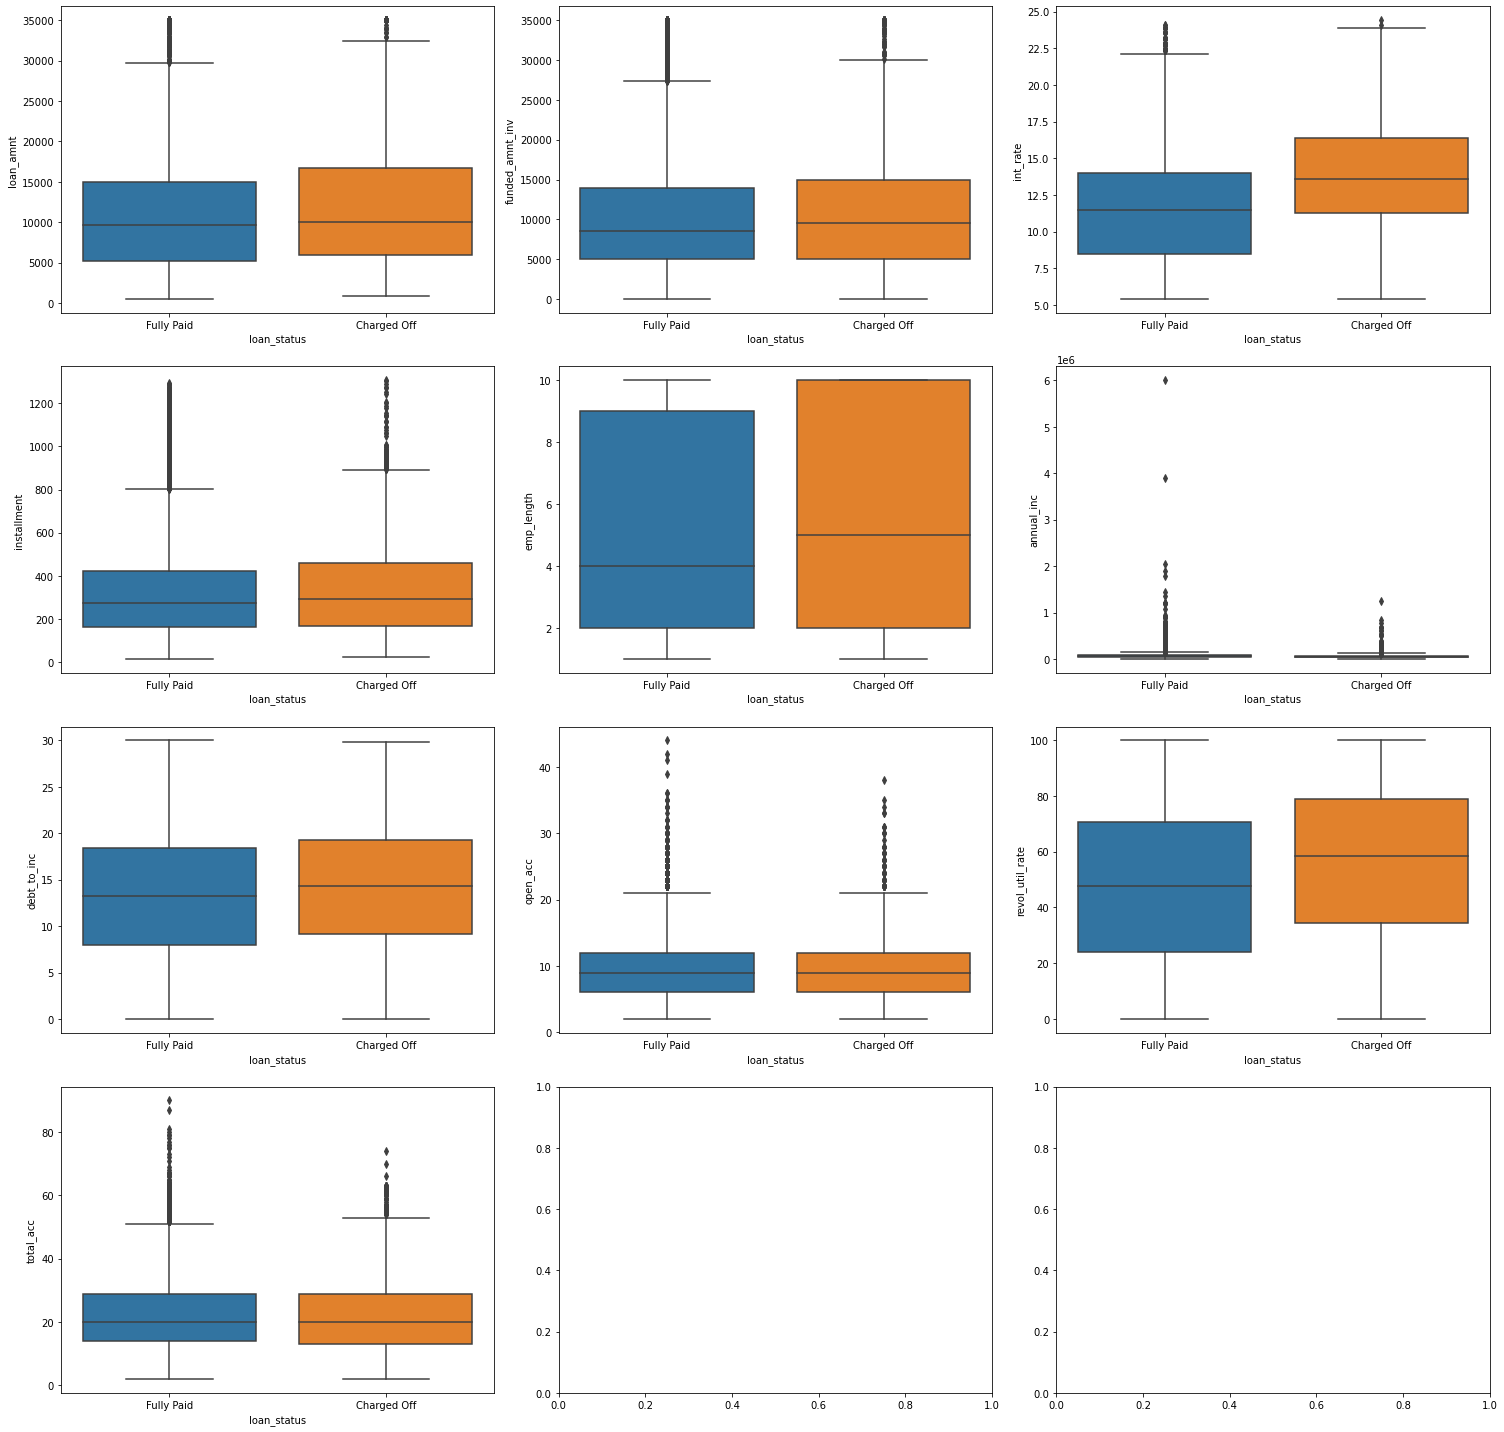

In [228]:
#define the rows and columns
nr_rows = 4
nr_cols = 3

#Instantiate the subplot object
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5))

#loop through the numeric columns to identify the outliers
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(numeric_columns):
            #sns.boxplot(x='loan_status',y='open_acc',data = loan)
            sns.boxplot(x='loan_status', y=numeric_columns[i], data=loan, ax = axs[r][c])

#show the subplots in a tight layout
plt.tight_layout()    
plt.show()

Let's choose top 4 features from above that has considerable amount of outliers and see upon removing these would outliers in other features also reduce or not. Let's start by removing outliers from :
1. annual_inc
2. installment
3. open_acc
4. total_acc

In [229]:
# for annual_inc, the highest value is 6000000 where as 50% quantile value is 59000, and the mean is 68816.90
# Let's remomve outliers from annual_inc i.e. 98 to 100%
annual_inc_q = loan["annual_inc"].quantile(0.98)
loan = loan[loan["annual_inc"] < annual_inc_q]

# for pub_rec, the highest value is 1305.19 where 50% quantile value is 278.15, and the mean is 322.61
# Let's remomve outliers from pub_rec i.e. 99 to 100%
installment_q = loan["installment"].quantile(0.99)
loan = loan[loan["installment"] <= installment_q]

# for open_acc, the highest value is 44 where 50% quantile value is 9, and the mean is 9.27
# Let's remomve outliers from open_acc i.e. 99 to 100%
open_acc_q = loan["open_acc"].quantile(0.99)
loan = loan[loan["open_acc"] < open_acc_q]

# for total_acc, the highest value is 90 where 50% quantile value is 20, and the mean is 22.06
# Let's remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]

In [230]:
#Let's look at the distribution of data from the describe function to understand the spread post removing outliers
loan.drop('loan_type',axis=1).describe(percentiles = [0.25,0.75,0.9,0.95,0.98,0.99,0.9975])

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,debt_to_inc,open_acc,revol_util_rate,total_acc
count,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36105.000000,36150.000000
mean,10613.597510,9815.756789,11.840159,308.747338,5.136874,62766.900297,13.263655,8.900360,48.832648,20.849599
std,6878.808854,6529.057506,3.630992,190.361323,3.436001,31612.198808,6.661243,3.928076,28.359138,9.988532
min,500.000000,0.000000,5.420000,15.690000,1.000000,4000.000000,0.000000,2.000000,0.000000,2.000000
25%,5000.000000,4994.232047,8.900000,163.570000,2.000000,40000.000000,8.130000,6.000000,25.400000,13.000000
50%,9250.000000,8375.000000,11.710000,270.440000,4.000000,56000.000000,13.360000,8.000000,49.300000,20.000000
75%,15000.000000,13575.000000,14.270000,407.170000,9.000000,79000.000000,18.520000,11.000000,72.400000,28.000000
90%,20000.000000,19675.000000,16.770000,582.930000,10.000000,106000.000000,22.290000,14.000000,87.800000,35.000000
95%,25000.000000,23575.000000,18.210000,690.740000,10.000000,125000.000000,23.805500,16.000000,93.600000,39.000000
98%,28000.000000,25000.000000,19.690000,818.380000,10.000000,150000.000000,24.840000,18.000000,97.200000,44.000000


From the above table we also notice that loan_amnt and funded_amnt_inv are highly co-related, hence we can drop funded_amnt_inv as this information will be reflected by loan_amnt column itself.

In [231]:
loan = loan.drop('funded_amnt_inv',axis=1)

Moving to the last point in checklist split columns: the datetime column - issue_d can be segregated into issued_year and issued_month to provide more insight

In [232]:
loan['issued_year'] = loan['issue_d'].dt.year
loan['issued_month'] = loan['issue_d'].dt.strftime("%b")

Let's verify if we have a clean data as we have come to the end of this checkpoint

In [233]:
((loan.isnull().sum()/len(loan.index))*100).sort_values(ascending=False)

revol_util_rate        0.124481
issued_month           0.000000
annual_inc             0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             0.000000
home_ownership         0.000000
verification_status    0.000000
issued_year            0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
debt_to_inc            0.000000
open_acc               0.000000
total_acc              0.000000
loan_type              0.000000
loan_amnt              0.000000
dtype: float64

Because there is less than 0.1% of null values, let's go ahead and drop these:

In [234]:
#removing the nulls in revolving utilization rate column
loan = loan[~loan.revol_util_rate.isnull()]
loan.reset_index(inplace=True,drop=True)

In [235]:
#Let's verify if we have a clean data at the end of this checkpoint
((loan.isnull().sum()/len(loan.index))*100).sort_values(ascending=False)

issued_month           0.0
issued_year            0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
debt_to_inc            0.0
open_acc               0.0
revol_util_rate        0.0
total_acc              0.0
loan_type              0.0
loan_amnt              0.0
dtype: float64

In [236]:
loan.shape

(36105, 20)

### Understanding Data Post Data Clean

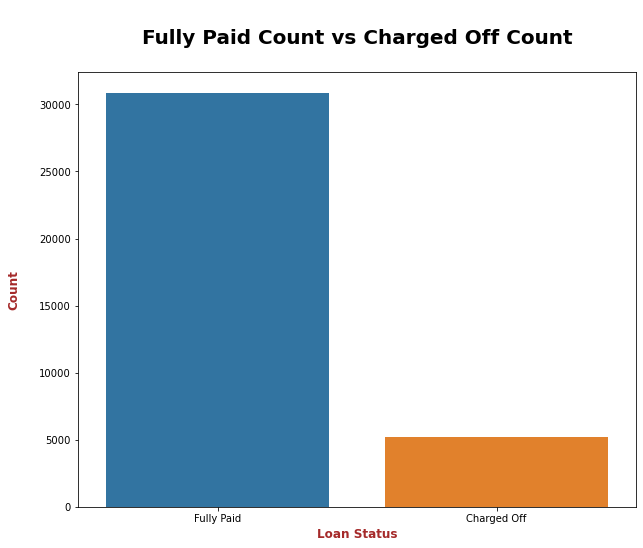

In [262]:
#Initialize Figure Size
plt.figure(figsize=[10,8])

#Plot the graph
sns.countplot(data=loan, x="loan_status")

# Adding and formatting title
plt.title("\nFully Paid Count vs Charged Off Count\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axesz
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Count\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'}) 

plt.show()

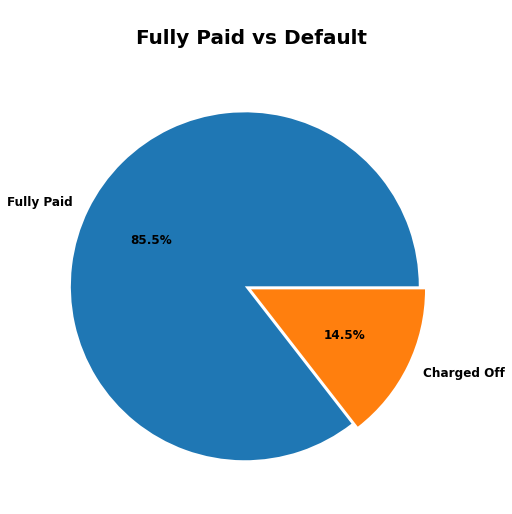

In [238]:
# Initialize the Figure Size
plt.figure(figsize=[15,8])

# Plot the Pie Chart
loan.loan_status.value_counts().plot.pie(explode=(0.04,0),autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axes
plt.ylabel("", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
#plt.xticks([0,1],['Charged Off','Fully Paid'])

# Adding and formatting title
plt.title("\nFully Paid vs Default\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.show()

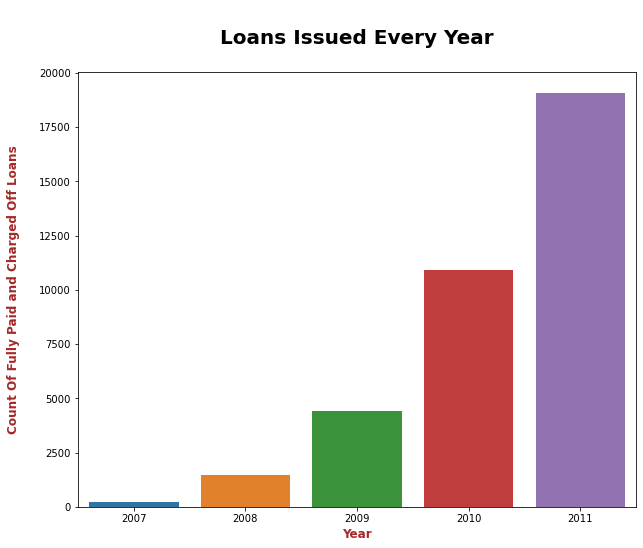

In [239]:
#Initialize Figure Size
plt.figure(figsize=[10,8])

#Plot the graph
sns.barplot(data=loan, x="issued_year", y="loan_type",estimator = np.size)

# Adding and formatting title
plt.title("\nLoans Issued Every Year\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

# Labeling Axesz
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Count Of Fully Paid and Charged Off Loans\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'}) 

#plt.xticks([0,1],['Charged Off','Fully Paid'])

plt.show()


<b>Conclusion: </b>
Out of the entire population of 36105, only 14.5% of people have defaulted. Also, it is evident that year after year, the number of loan applicants double. Hence it is crucial that Lending Club identify's factors for potential default applicant and minimise any loss.

## Checkpoint 3: Binning to Obtain Derived Metrics

As we know there are broadly 2 types of variables:
1. Categorical Variables
2. Quantitative Variables

The quantitaive variables being continuous in nature would not provide much insight to data. Binning these continuous variables will provide us more insight.

In [240]:
# create bins for loan_amnt range
cut_bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k','25k+']
loan['loan_amnt_bracket'] = pd.cut(loan['loan_amnt'], cut_bins, labels=bucket_l)

# create bins for int_rate range
cut_bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_bracket'] = pd.cut(loan['int_rate'], cut_bins, labels=bucket_l)

# create bins for revol_util_rate range
cut_bins = [0, 25, 50, 75, 100]
bucket_l = ['low', 'medium', 'high', 'very high']
loan['revol_util_rate_bracket'] = pd.cut(loan['revol_util_rate'], cut_bins, labels=bucket_l)

# create bins for annual_inc range
cut_bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']
loan['annual_inc_bracket'] = pd.cut(loan['annual_inc'], cut_bins, labels=bucket_l)

# create bins for debt_to_inc range
cut_bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['debt_to_inc_bracket'] = pd.cut(loan['debt_to_inc'], cut_bins, labels=bucket_l)

# create bins for dti range
cut_bins = [0, 200, 500, 800, 1000]
bucket_l = ['low', 'medium', 'high', 'very high']
loan['installment_bracket'] = pd.cut(loan['installment'], cut_bins, labels=bucket_l)

In [241]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36105 non-null  int64         
 1   term                     36105 non-null  object        
 2   int_rate                 36105 non-null  float64       
 3   installment              36105 non-null  float64       
 4   grade                    36105 non-null  object        
 5   sub_grade                36105 non-null  object        
 6   emp_length               36105 non-null  int32         
 7   home_ownership           36105 non-null  object        
 8   annual_inc               36105 non-null  float64       
 9   verification_status      36105 non-null  object        
 10  issue_d                  36105 non-null  datetime64[ns]
 11  loan_status              36105 non-null  object        
 12  purpose                  36105 n

Before moving to univariate analysis, let's sort our dataframe as per grade so that our analysis becomes easier

## Checkpoint 4: Univariate Analysis

Let's start analysing the data in hand to get useful insights and choose categorical and quantitative variables that inflaunce the default loan status.

Let's first list down the categorical variables and quantitative varaibles in separate lists

In [242]:
#find features that are of object/category data type and add it in a list
cat_feat = [column for column in loan.drop('loan_status',axis=1).columns if loan[column].dtype.name in ['object','category']]
print(loan.loc[:,cat_feat].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   term                     36105 non-null  object  
 1   grade                    36105 non-null  object  
 2   sub_grade                36105 non-null  object  
 3   home_ownership           36105 non-null  object  
 4   verification_status      36105 non-null  object  
 5   purpose                  36105 non-null  object  
 6   issued_month             36105 non-null  object  
 7   loan_amnt_bracket        36105 non-null  category
 8   int_rate_bracket         36105 non-null  category
 9   revol_util_rate_bracket  35199 non-null  category
 10  annual_inc_bracket       36105 non-null  category
 11  debt_to_inc_bracket      36105 non-null  category
 12  installment_bracket      36105 non-null  category
dtypes: category(6), object(7)
memory usage: 2.1+ MB
None


In [243]:
#find features that are of numeric data type and add it in a list
quant_feat = [column for column in loan.drop('loan_type',axis=1).columns if loan[column].dtype in ['int','float','int64']]
print(loan.loc[:,quant_feat].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        36105 non-null  int64  
 1   int_rate         36105 non-null  float64
 2   installment      36105 non-null  float64
 3   emp_length       36105 non-null  int32  
 4   annual_inc       36105 non-null  float64
 5   debt_to_inc      36105 non-null  float64
 6   open_acc         36105 non-null  int64  
 7   revol_util_rate  36105 non-null  float64
 8   total_acc        36105 non-null  int64  
 9   issued_year      36105 non-null  int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 2.6 MB
None


### 1. Categorical Variables

Let's now define a function that would plot barplot of default rate(%) against each of the category that we have listed above

In [244]:
#plot barplot for categorical and quantitative variables as part of univariate analysis
def bar_plot_uni_avg_rate(cat_var):
    #Prepare a sub_frame from just the 2 desired variables, this is done in order to sort the variables
    data1 = loan.loc[:,[cat_var,'loan_type']].sort_values(['loan_type',cat_var])
    
    #if the variable is issued_month then sort it according to month
    if(cat_var=='issued_month'):
        data1["Month"] = pd.to_datetime(data1[cat_var], format='%b', errors='coerce').dt.month
        data1 = data1.sort_values(by="Month")
    
    #plot the Bar Graph
    plt.figure(figsize=[16,8])
    sns.barplot(x=cat_var, y='loan_type', data=data1)

    # Adding and formatting title
    title_str = "\nDistribution - "+cat_var+"\n"
    plt.title(title_str, fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

    # Labeling Axesz
    plt.xlabel(cat_var, fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
    plt.ylabel("Default Rate\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'}) 
    
    #if there are more number of xticks, rotate the same to avoid cluttered appearance
    if (loan.loc[:,cat_var].nunique()>12):
        plt.xticks(rotation='vertical')
    plt.show()   

Let's plot graph for each variable in list of categorical features noted down

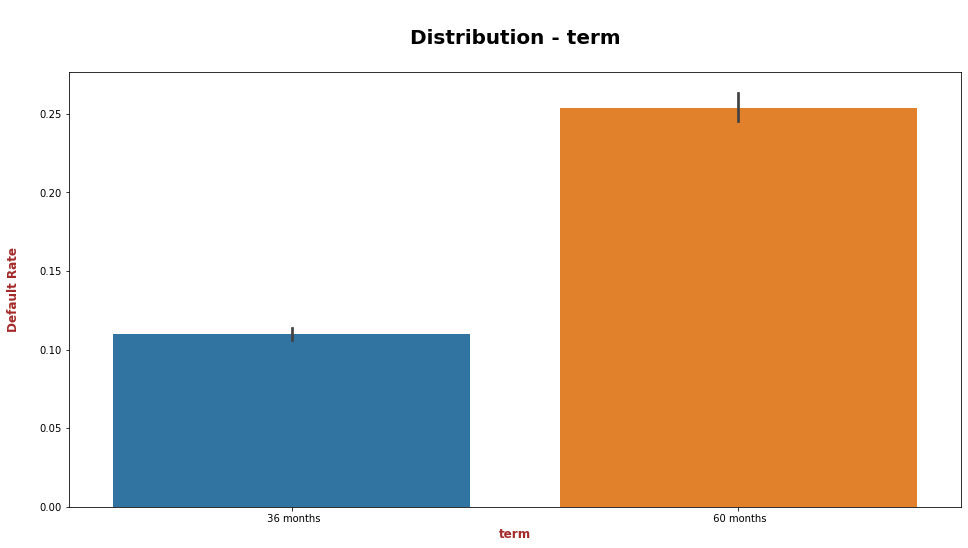

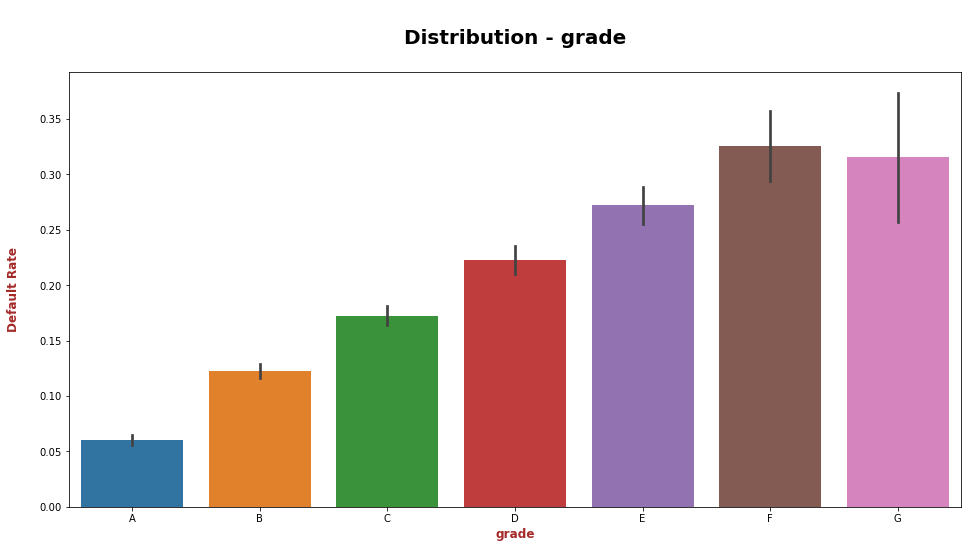

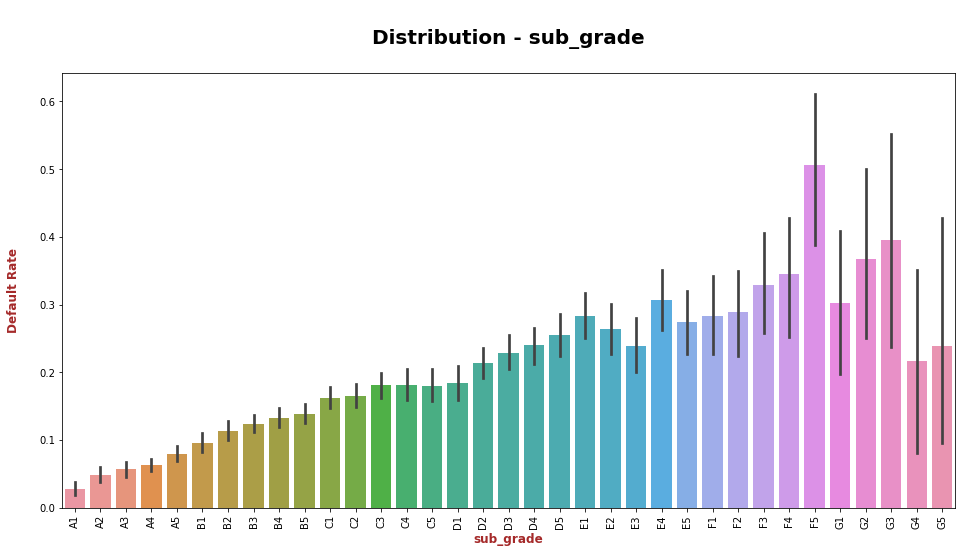

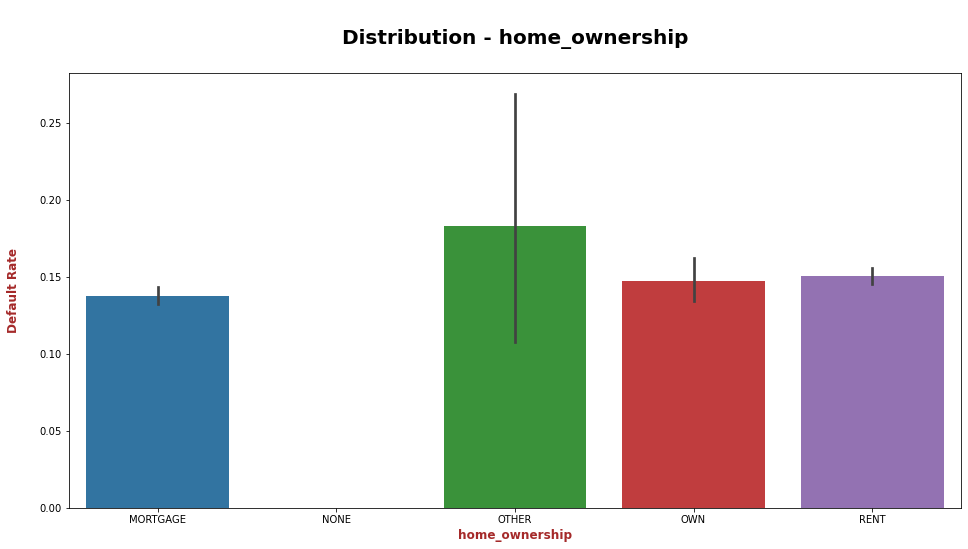

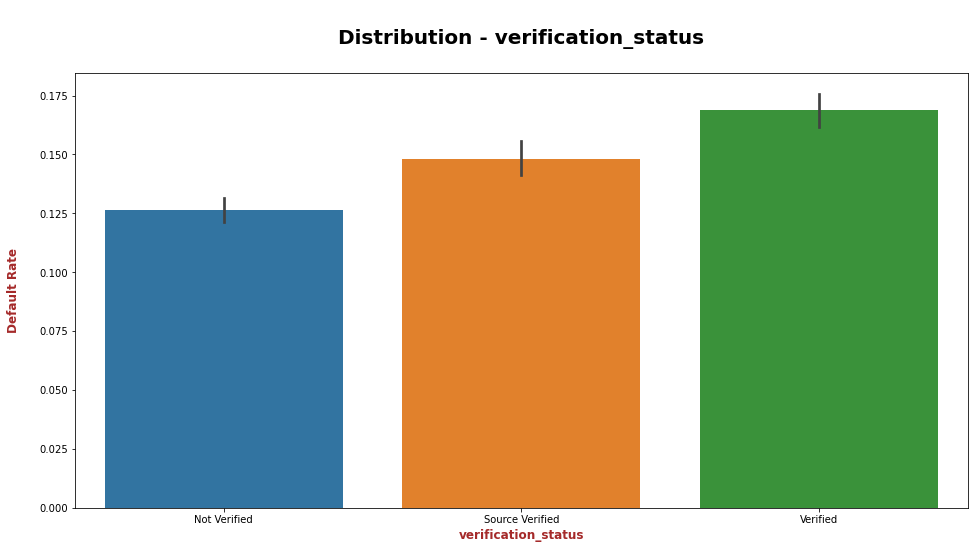

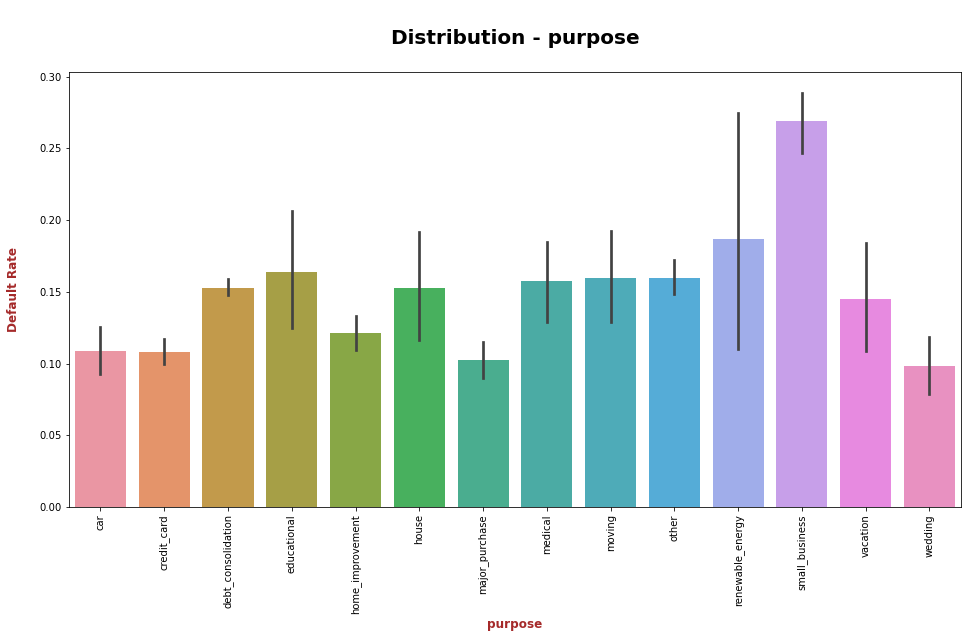

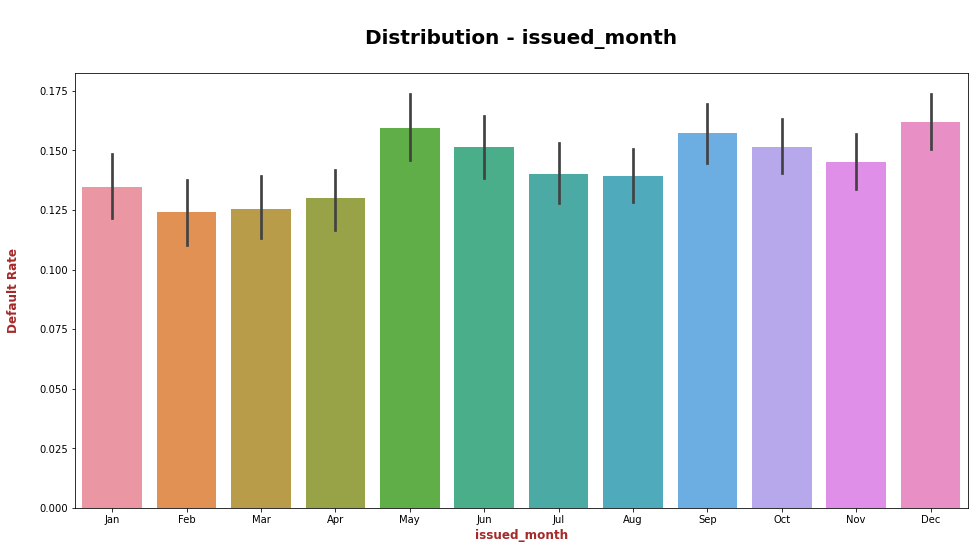

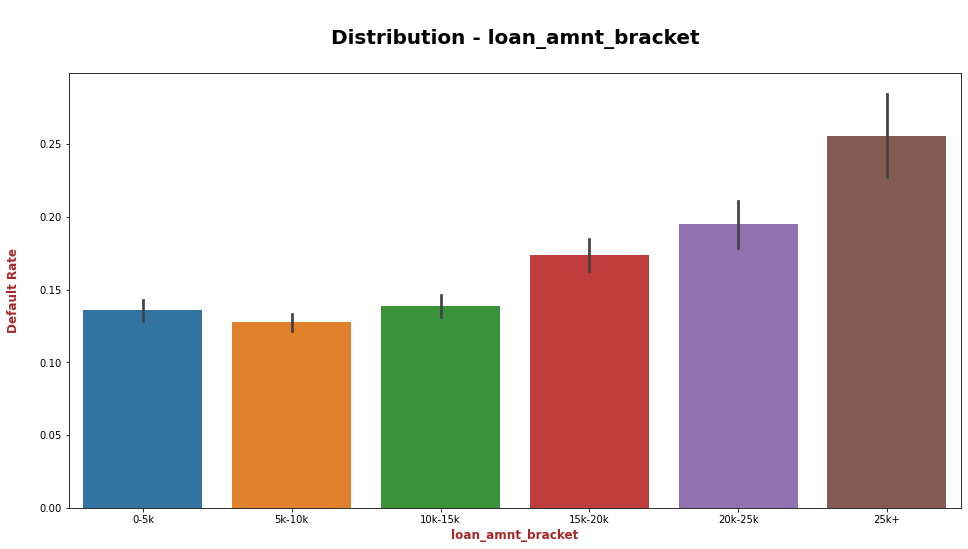

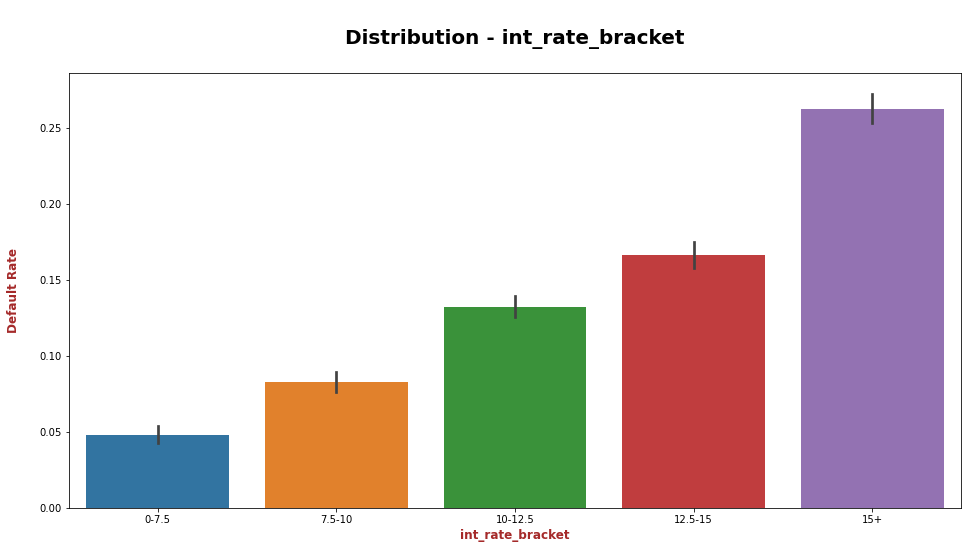

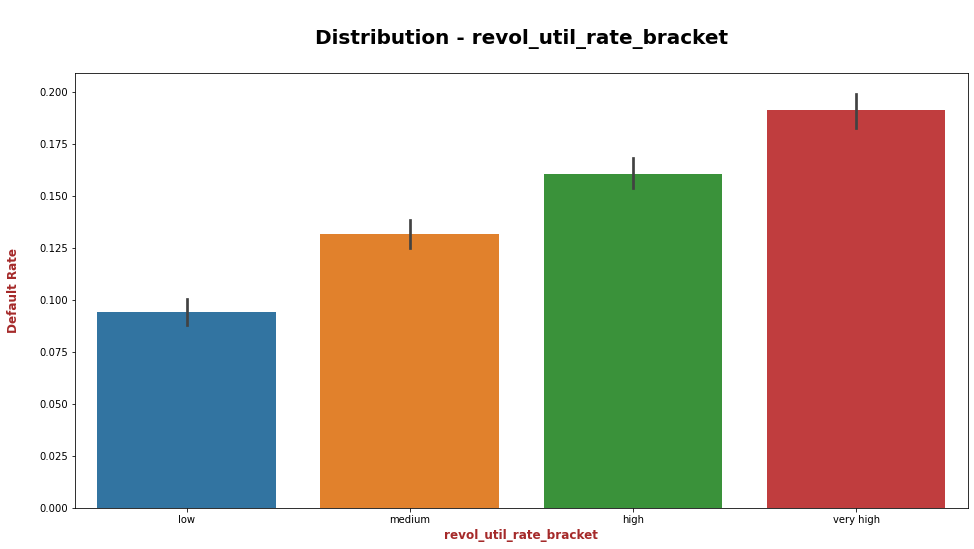

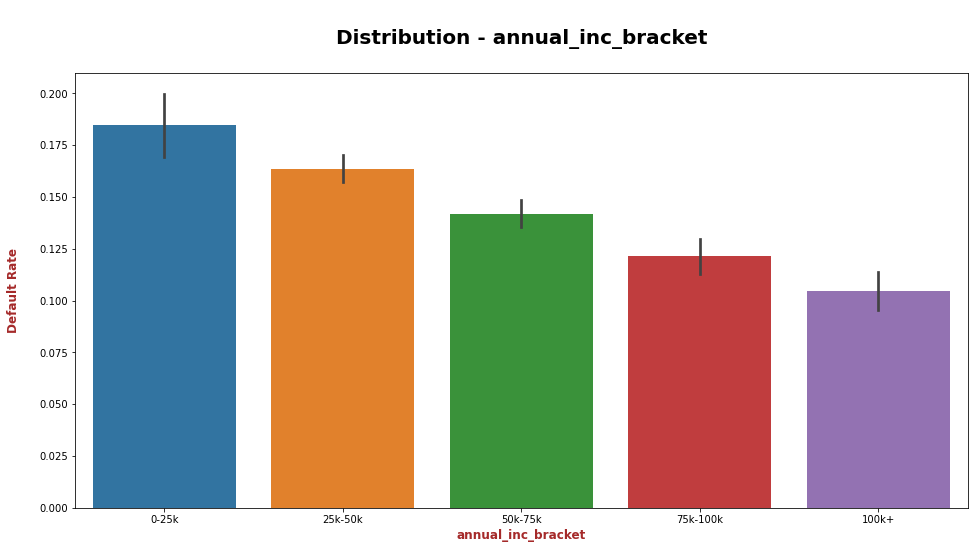

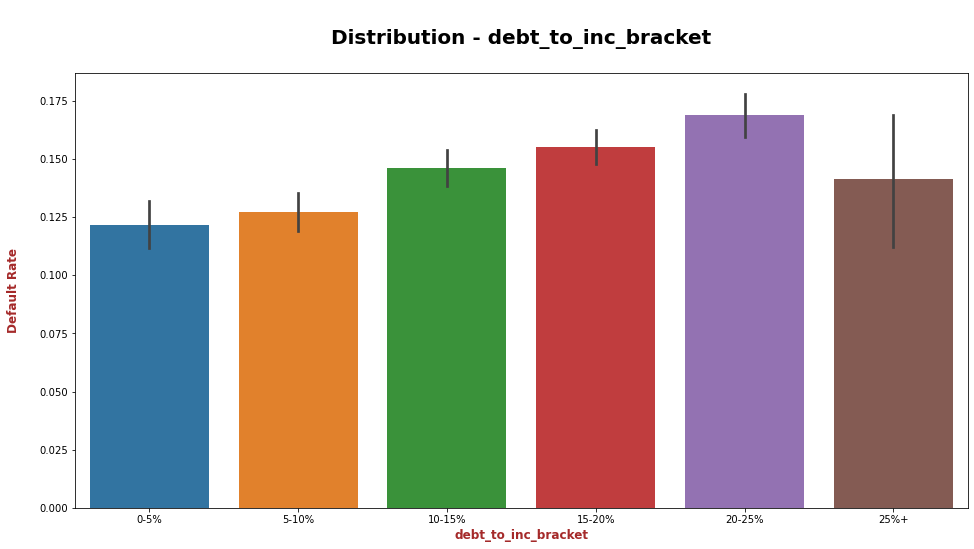

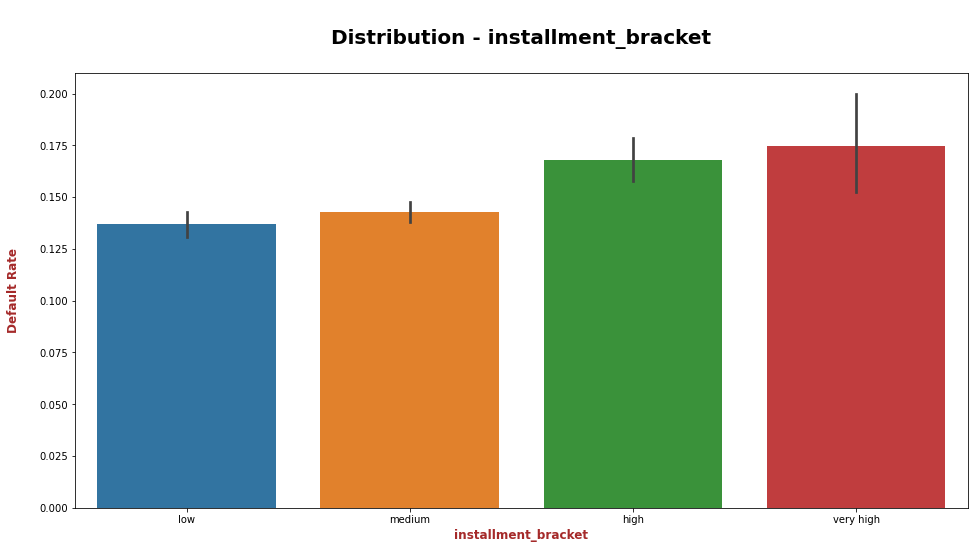

In [245]:
#loop throgh the list of categorical variables
for category in cat_feat:
    bar_plot_uni_avg_rate(category)

<b>Conclusion:</b> 
1. From above plot for ‘term’ we can infer that the defaulters' rate is increasing as term increases, hence the chances of loan getting deaulted is less for 36m long term than 60m long term.
2. From above plot for ‘grade’ we can infer that the defaulters' rate is increasing as the grade progresses, hence the chances of loan getting defaulted increases with the grade from A moving towards G.
3. From above plot for ‘sub_grade’ we can infer that the defaulters' rate is increasing as the sub_grade progresses, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards F5 and decreases subtly from G1 to G5. But SubGrade is highly corelated on Grade. Hence for our analysis we can use grade and ignore subgrade.
4. From above plot for ‘home_ownership’ we can infer that the defaulters' rate is more or less constant here. It is quite more for OTHERS, hence default rate will depend on home ownership if it is of type OTHER or not.
5. From above plot for ‘verification_status’ we can infer that the defaulters' rate is increasing for Verified/Source Verified and is less for Not Verified users than the other 2, but not useful for analysis as this is what LC verifies post receiving application and the default rate is very small.
6. From above plot for ‘purpose’ we can infer that the defaulters' rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan depending on whether it is a small business or not
7. From above plot for ‘issued_month’ we can infer that the defaulters' rate is nearly constant from May to Dec, hence not so useful for our analysis
8. From above plot for ‘loan_amnt_bracket’ we can infer that the defaulters' rate is increasing with the loan_amnt_bracket values, hence rate will depend on loan_amnt_bracket feature
9. From above plot for ‘int_rate_bracket’ we can infer that the defaulters' rate is increasing with int_rate_bracket values, hence rate will depend on int_rate_bracket feature
10. From above plot for ‘revol_util_rate_bracket’ we can infer that the defaulters' rate is increasing with int_rate_bracket values, hence rate will depend on revol_util_rate_bracket feature
11. From above plot for ‘annual_inc_bracket’ we can infer that the defaulters' rate is decreasing with annual_inc_bracket values, hence rate will depend on annual_inc_bracket feature
12. From above plot for ‘debt_to_inc_bracket’ we can infer that the defaulters' rate is increasing with debt_to_inc_bracket values, hence rate will depend on debt_to_inc_bracket feature
13. From above plot for ‘installment_bracket’ we can infer that the defaulters' rate is increasing with installment_bracket values, hence rate will depend on installment_bracket feature

### 2. Quantitative Variables

Let's start by looking at the list of quantitative columns that we have noted down

In [246]:
#Unique values against each of the quantitative columns
loan.loc[:,quant_feat].nunique()

loan_amnt            847
int_rate             369
installment        14304
emp_length            10
annual_inc          4806
debt_to_inc         2837
open_acc              20
revol_util_rate     1085
total_acc             47
issued_year            5
dtype: int64

Let's remove the columns which we have used for binning and deriving a categorical column as we have already done analysis aginst data in these comluns. Hence let's remove :
1. loan_amnt
2. int_rate
3. annual_inc
4. debt_to_inc
5. installment
6. revol_util_rate

In [247]:
#List the unwanted columns in a list and then remove the same from the original list
unwanted_columns = ['revol_util_rate','loan_amnt','int_rate','annual_inc','debt_to_inc','installment']
quant_feat = [column_name for column_name in quant_feat if column_name not in unwanted_columns]

In [248]:
quant_feat

['emp_length', 'open_acc', 'total_acc', 'issued_year']

Let's plot the graph for wach of the above quant variables

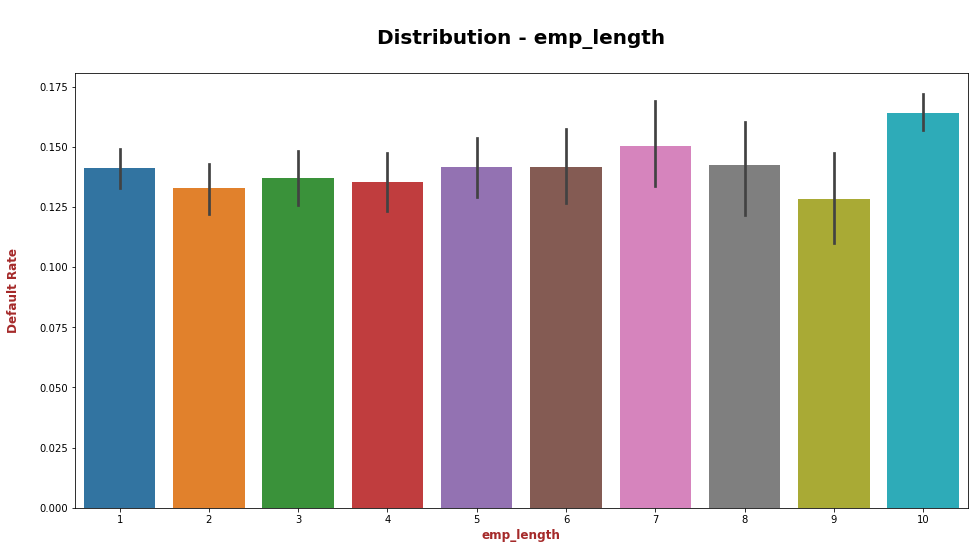

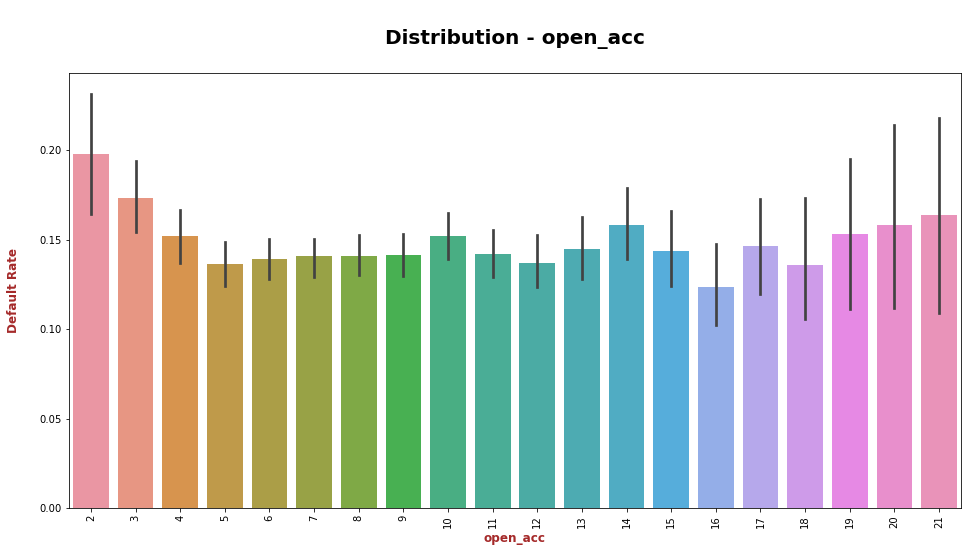

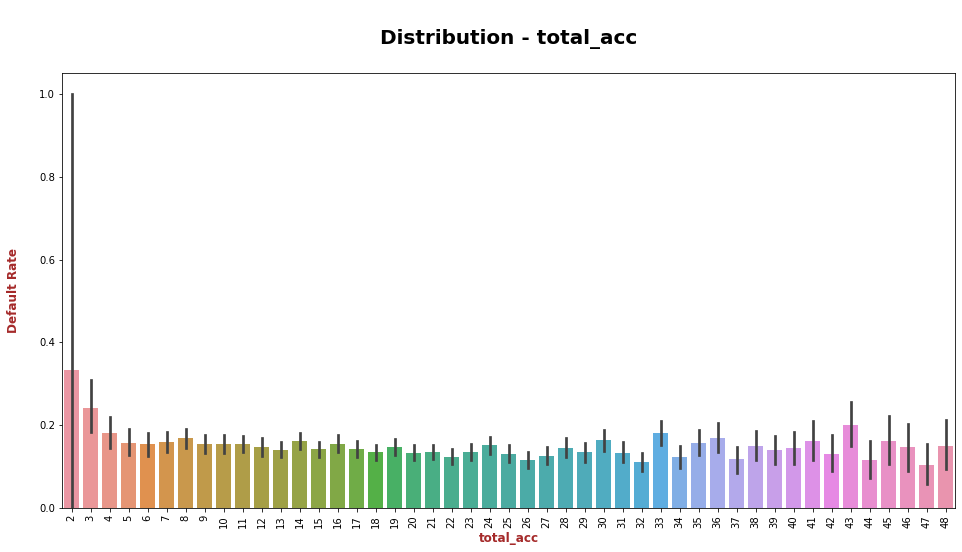

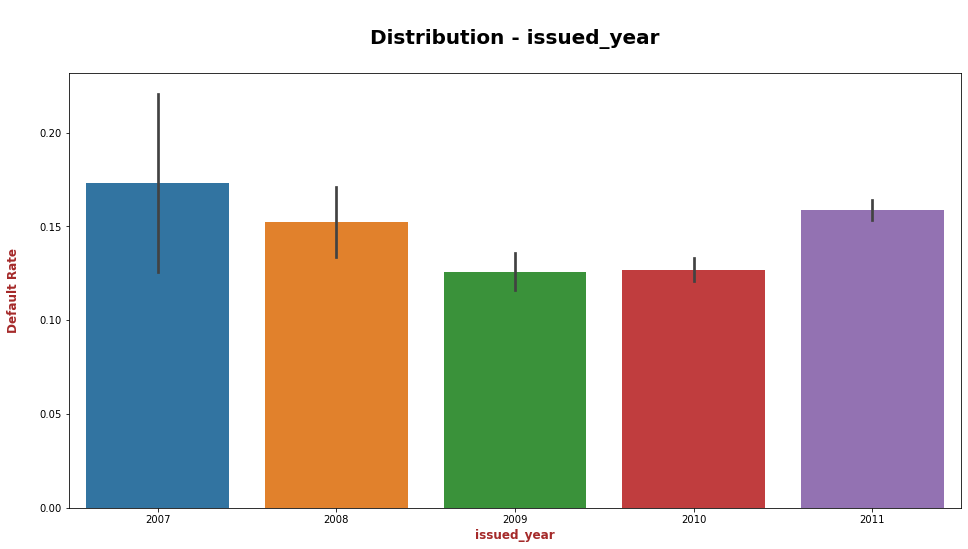

In [249]:
#loop through the quantitative variables
for quant_var in quant_feat:
    bar_plot_uni_avg_rate(quant_var)

<b>Conclusion:</b>
1. There is no insightful conclusion obtained from any of the above quantitative variables as the default rate is more or less constant. Hence these variables should not have much impact on defaulters.

### Univariate Analysis Conclusion:

The following variables/features where analysed to be impactful for default rate upon performing univariate analysis:

1. term
2. grade
3. home_ownership
4. puropose
5. loan_amnt
6. int_rate
7. annual_inc
8. debt_to_inc
9. installment
10. revol_util_rate

## Checkpoint 4: Bivariate Analysis

Let's proceed towards analysing data using 2 variables for the list of categorical and quantitative variables and see what insights can be drawn from there

In [250]:
cat_var_def = ['term','grade','purpose','home_ownership'] #Not considering sub-grade as it is positively corelated to grade
cat_var_bin = [column for column in loan.drop('loan_status',axis=1).columns if loan[column].dtype.name == 'category']

<b>1. Categorical Variables</b>

Let's start by writing a function that plots 2 desired variables against default rate(%)

In [251]:
def bar_plot_biv_avg_rate(x1, hue1):  
    #Prepare a sub_frame from just the desired variables, this is done in order to sort the variables
    data1 = loan.loc[:,[x1,'loan_type',hue1]].sort_values(['loan_type',x1,hue1])
    
    #plot the Bar Graph
    plt.figure(figsize=[16,8])
    sns.barplot(x=x1, y='loan_type', hue=hue1, data=data1,ci=None)

    # Adding and formatting title
    title_str = "\nLoan Default rate(%) wrt '"+x1+"' variable for hue '"+hue1+"' in the data using barplot\n"
    plt.title(title_str, fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

    #Labeling Axesz
    plt.xlabel(x1, fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
    plt.ylabel("Default Rate\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'}) 
    
    #if there are more number of xticks, rotate the same to avoid cluttered appearance
    if (loan.loc[:,x1].nunique()>12):
        plt.xticks(rotation='vertical')
    plt.show() 

Plot the detailed graphs of vairables in cat_var_def and cat_var_bin against default rate

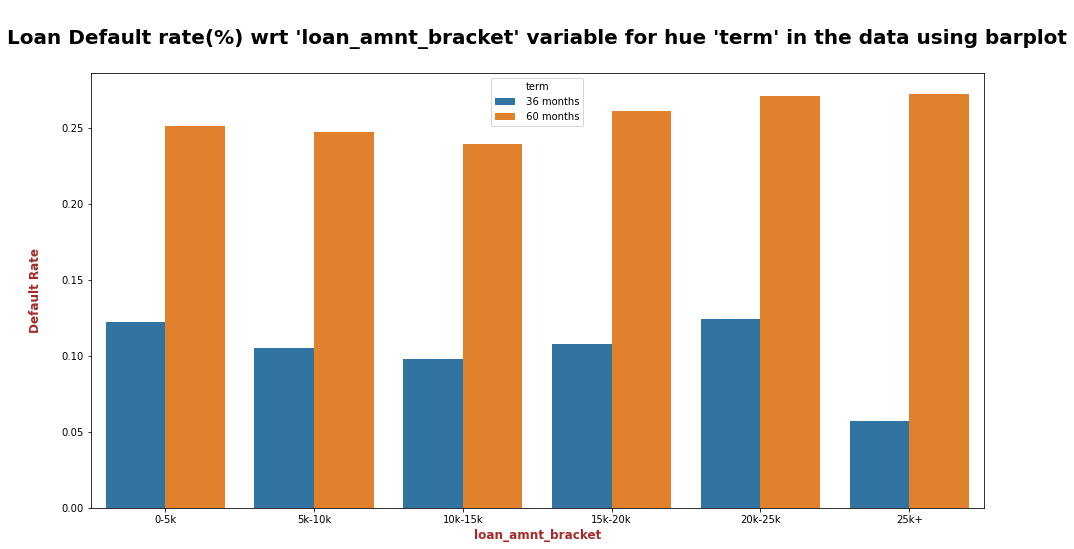

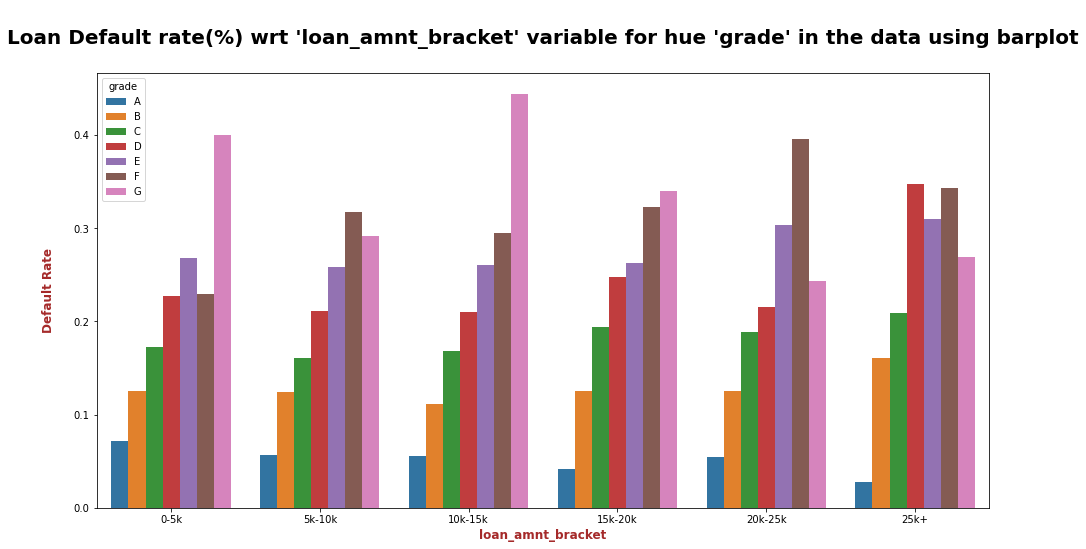

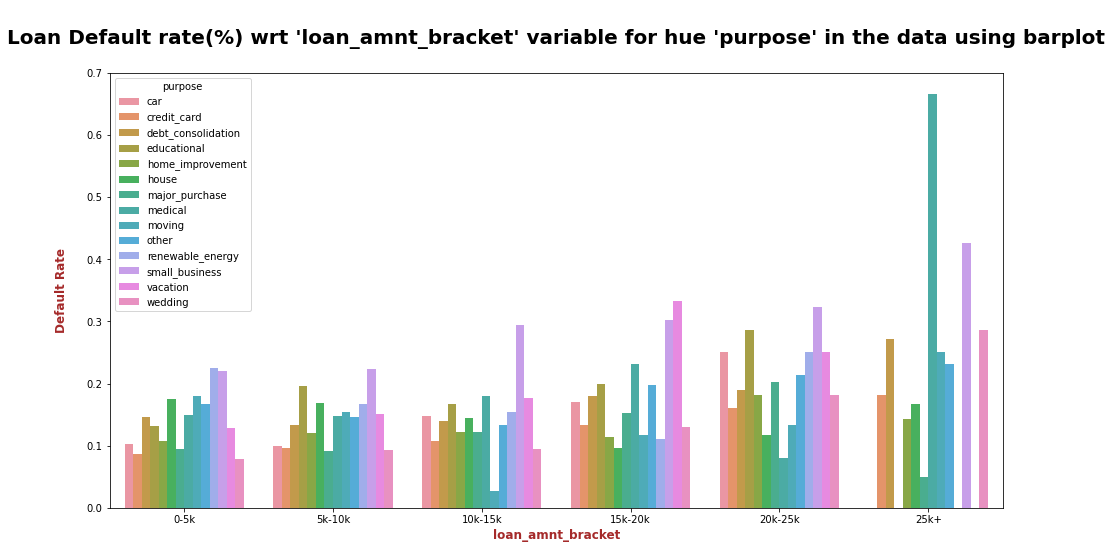

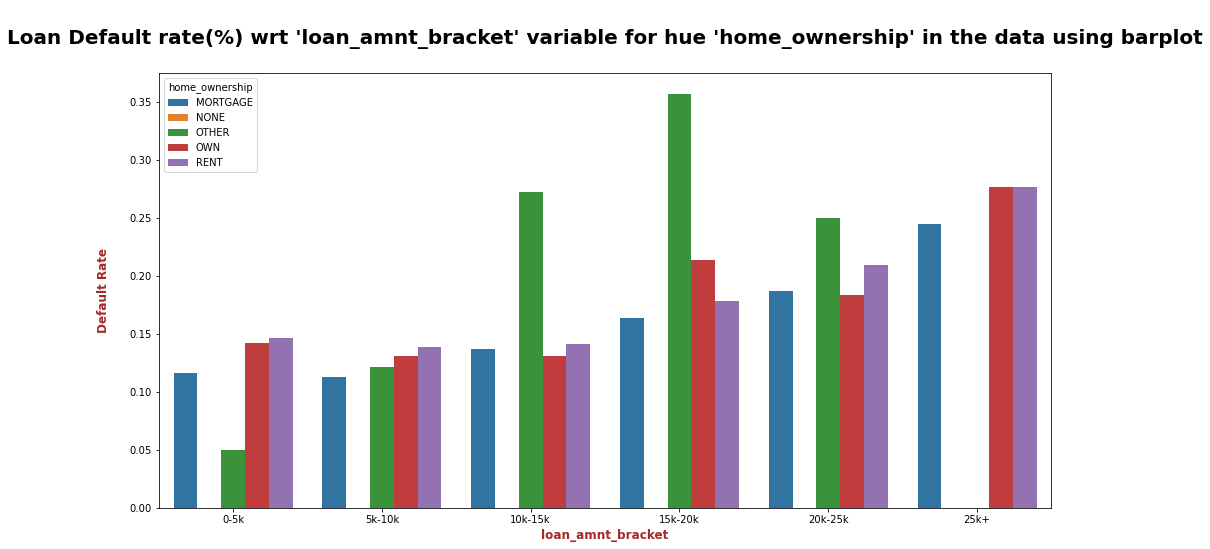

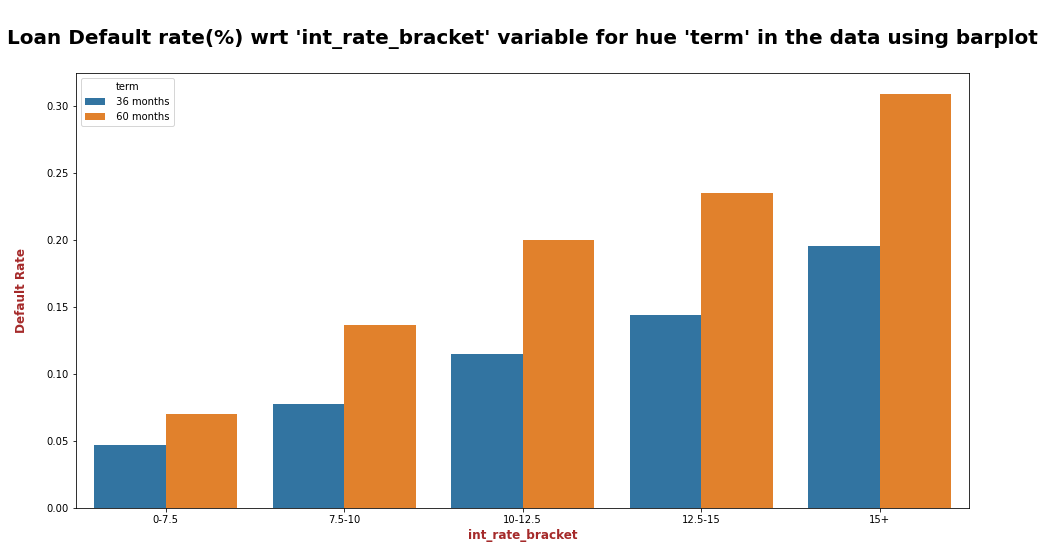

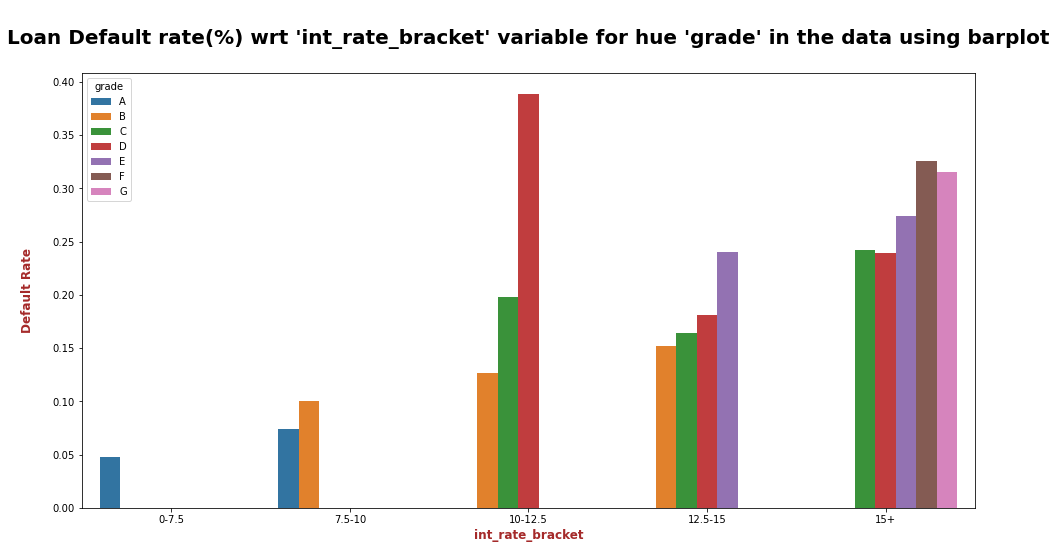

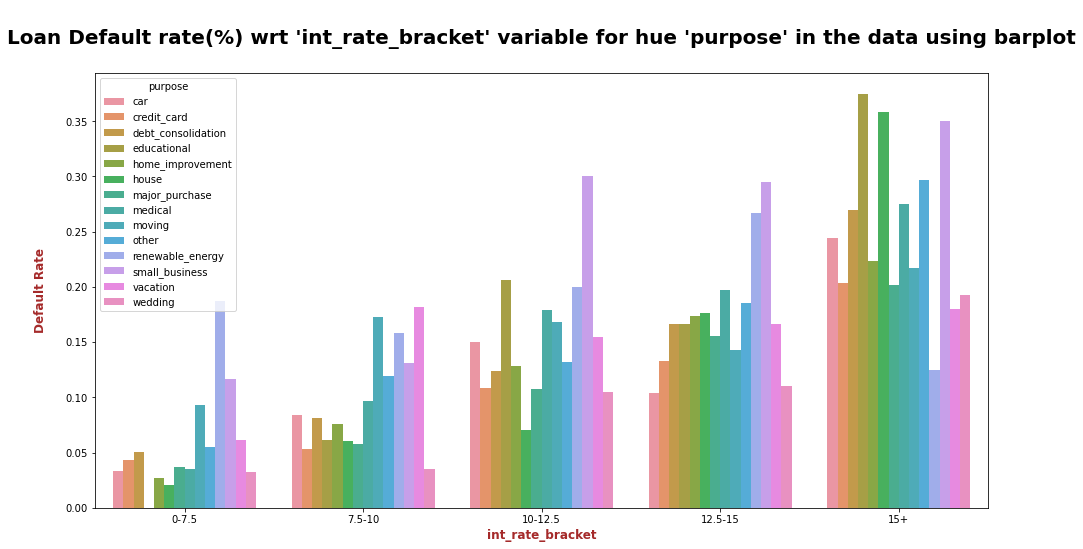

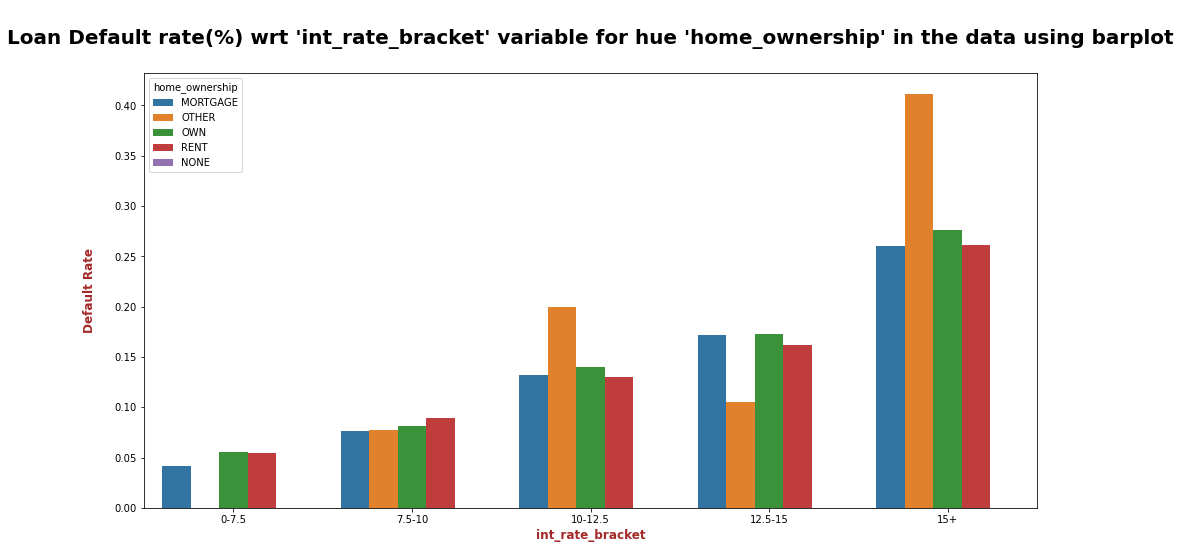

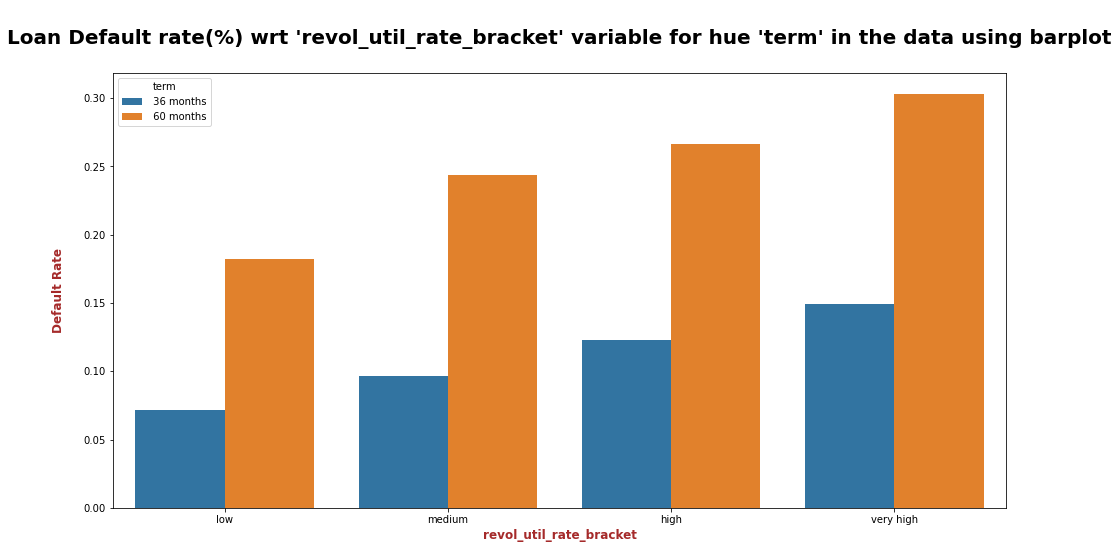

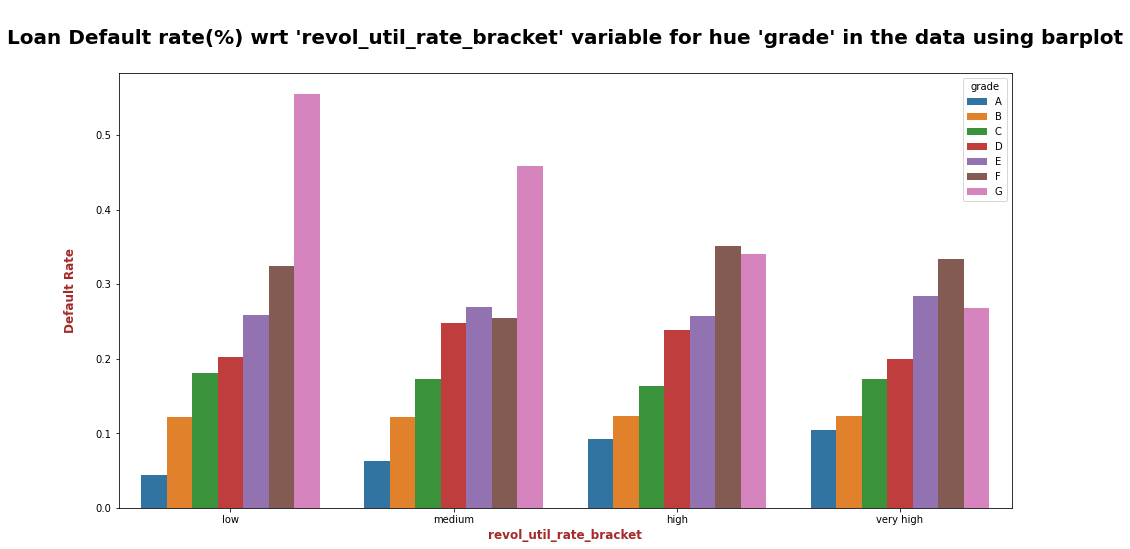

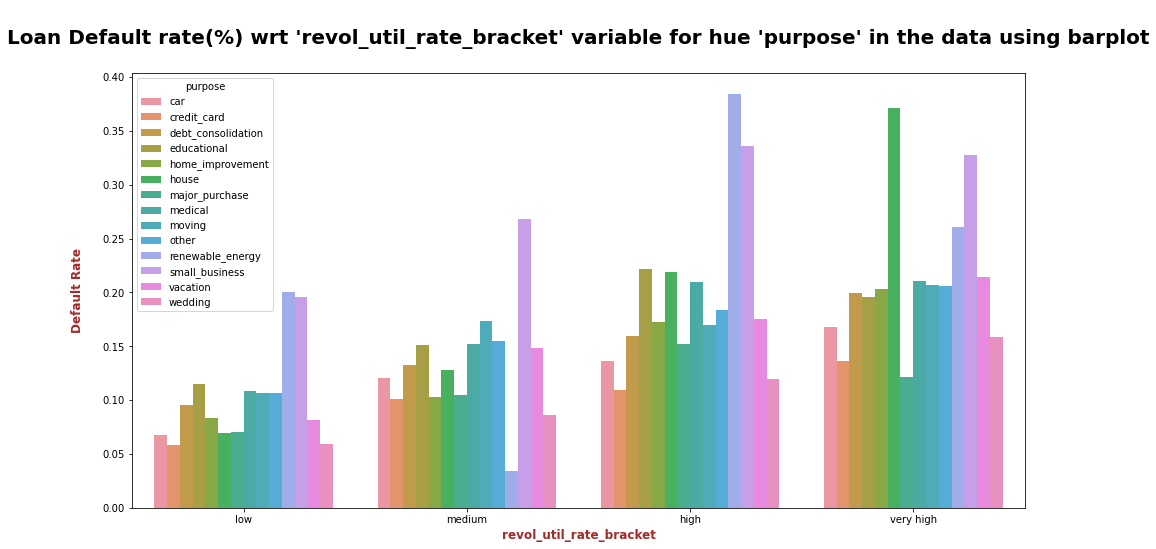

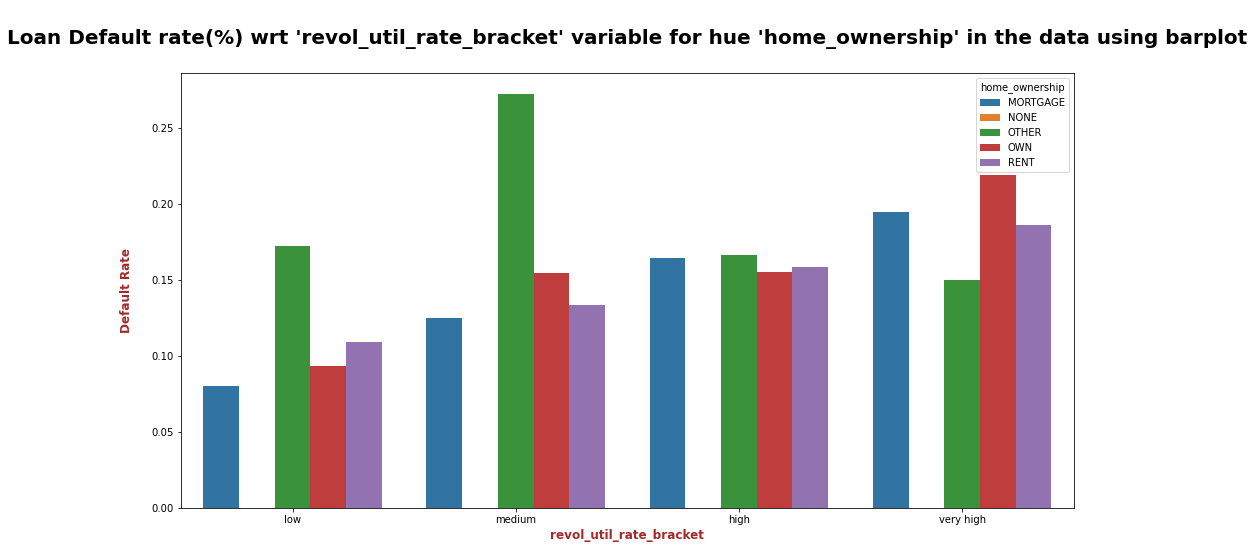

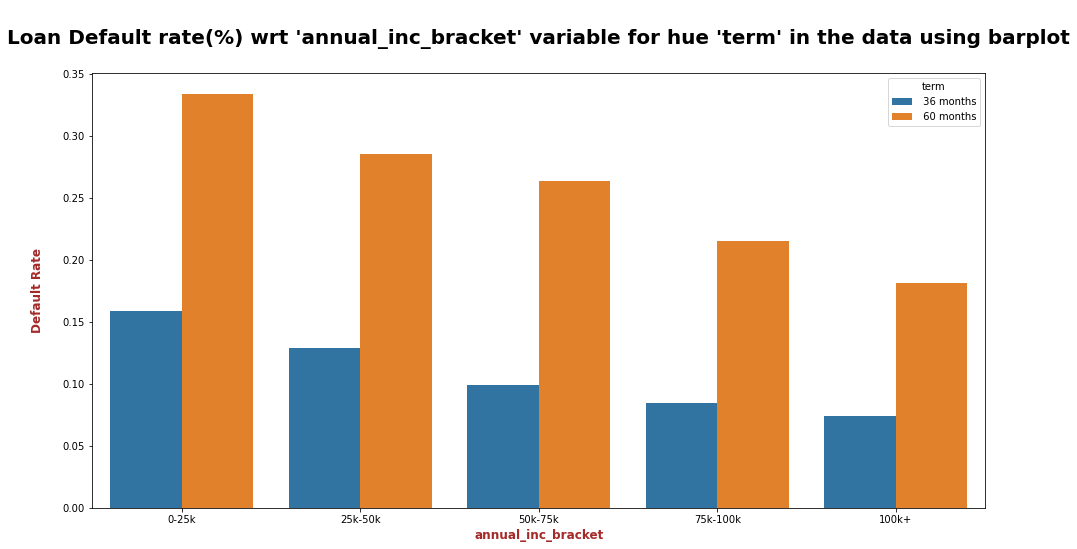

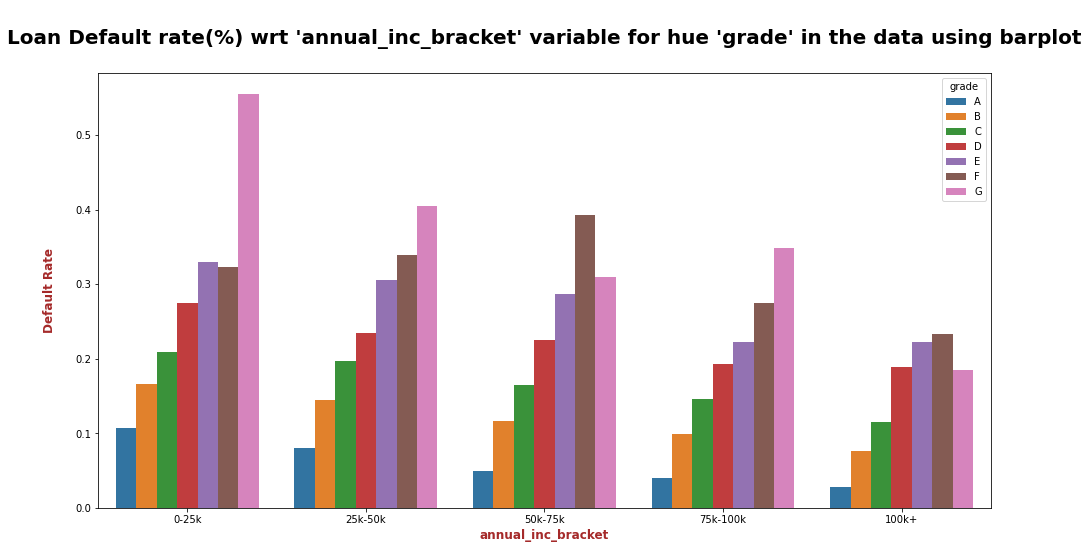

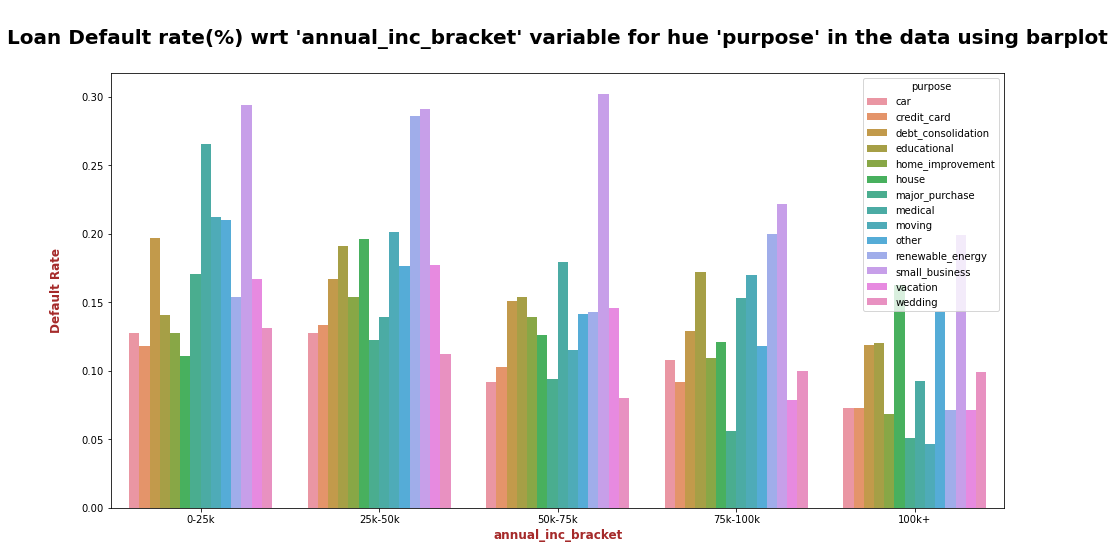

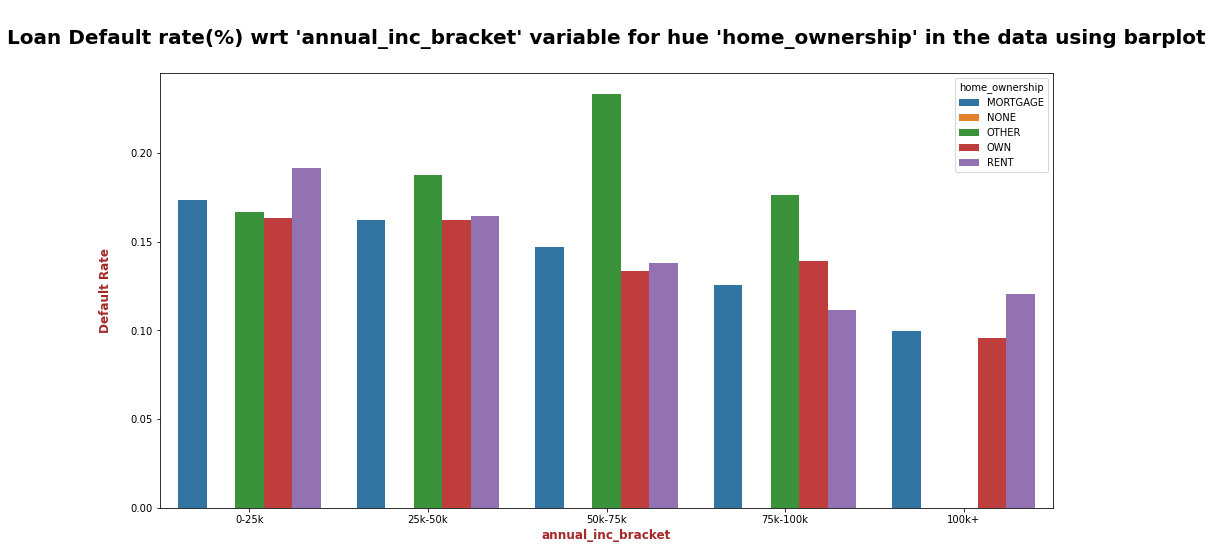

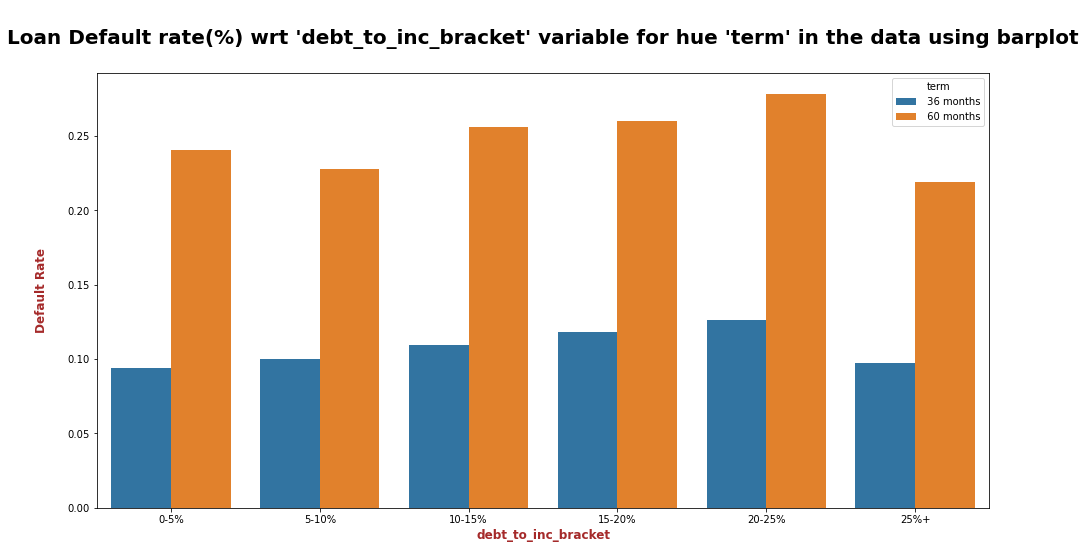

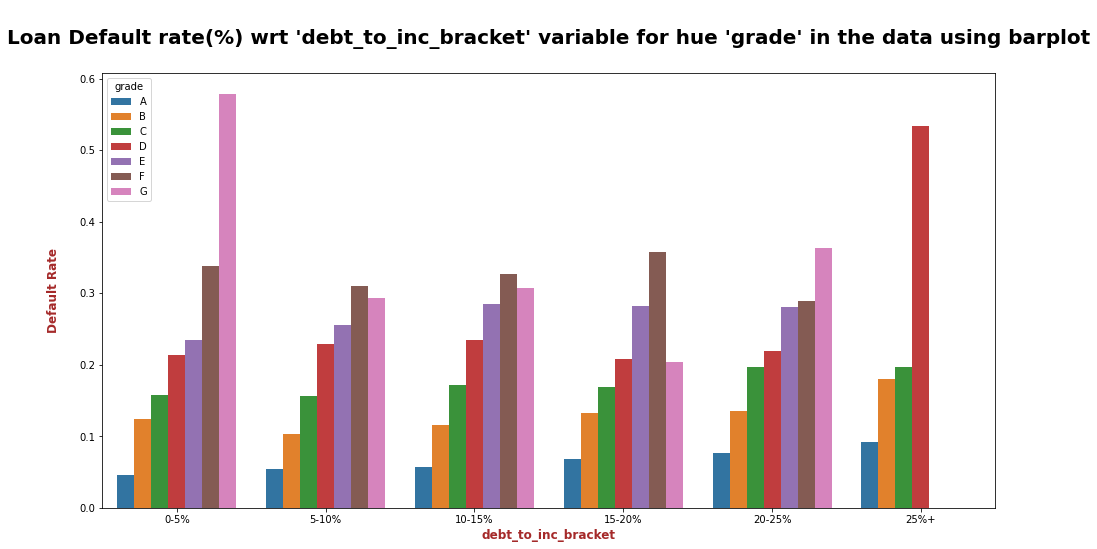

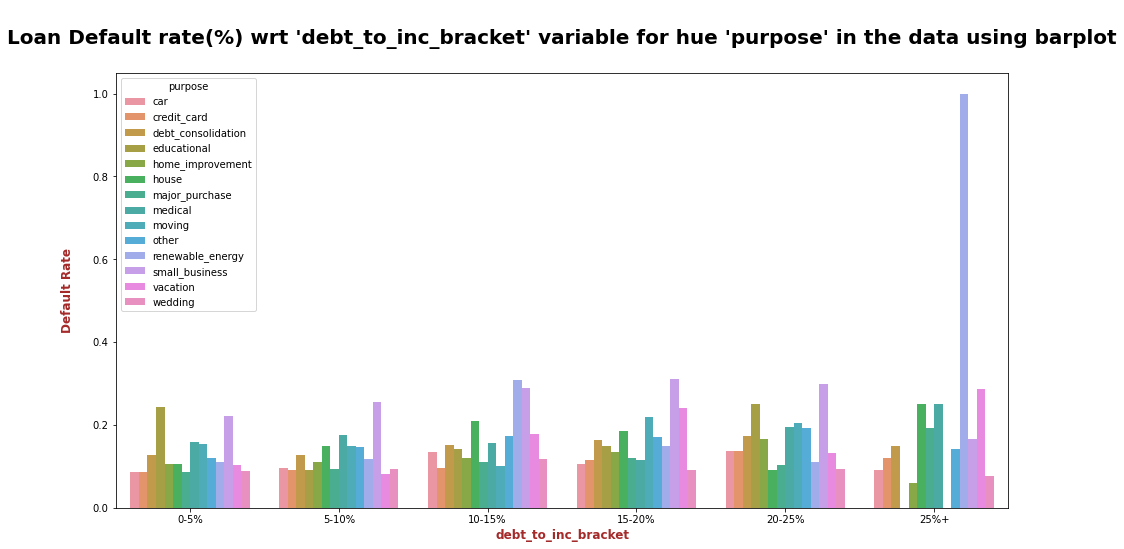

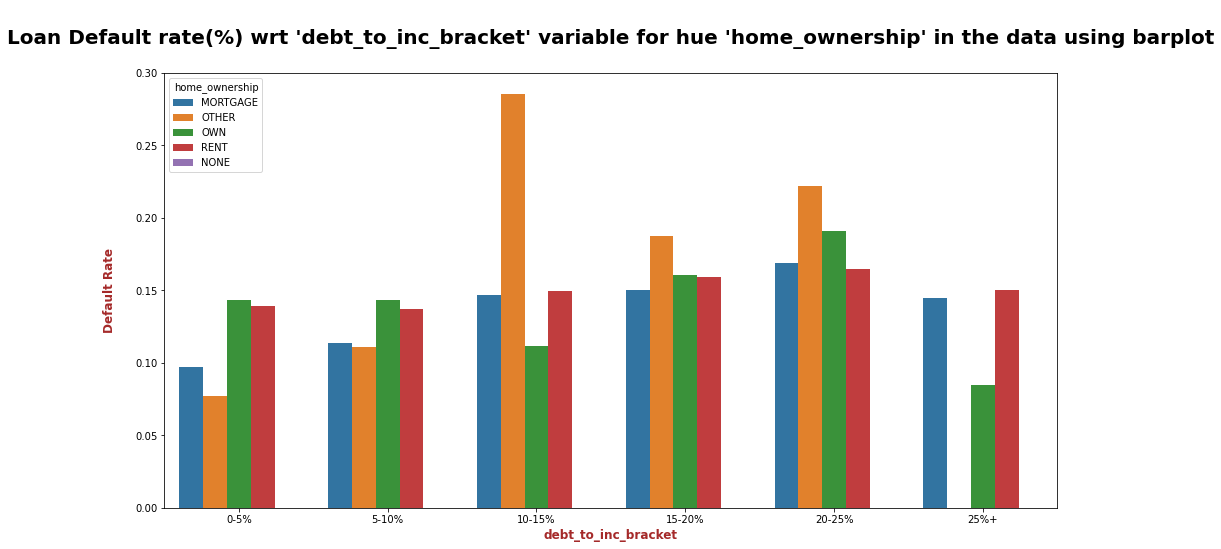

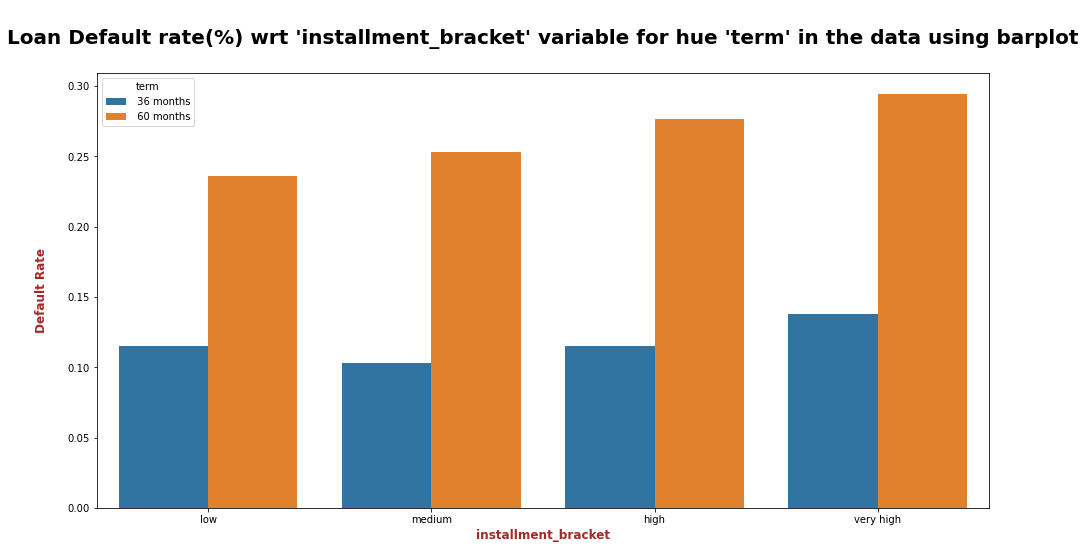

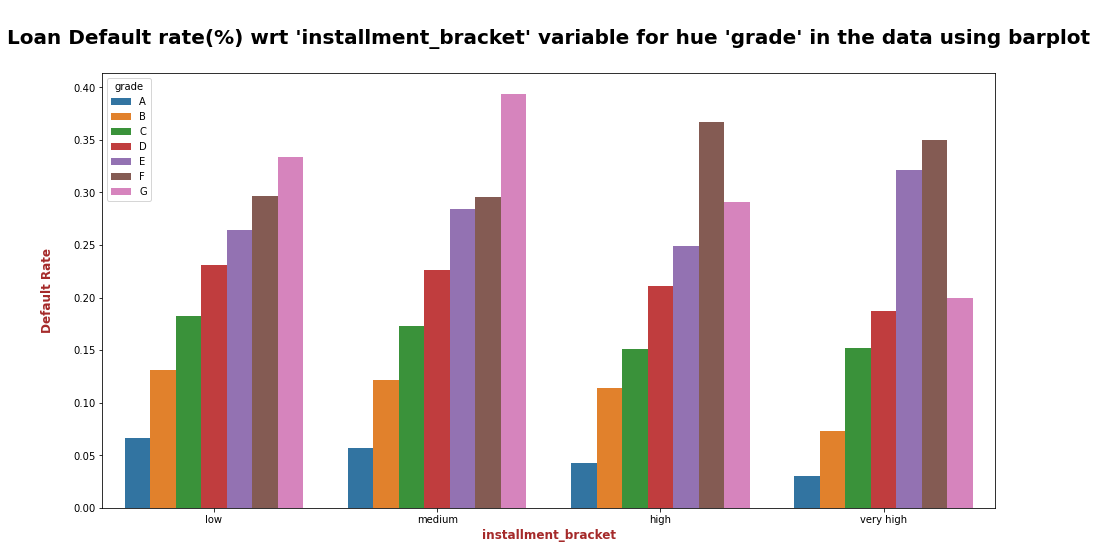

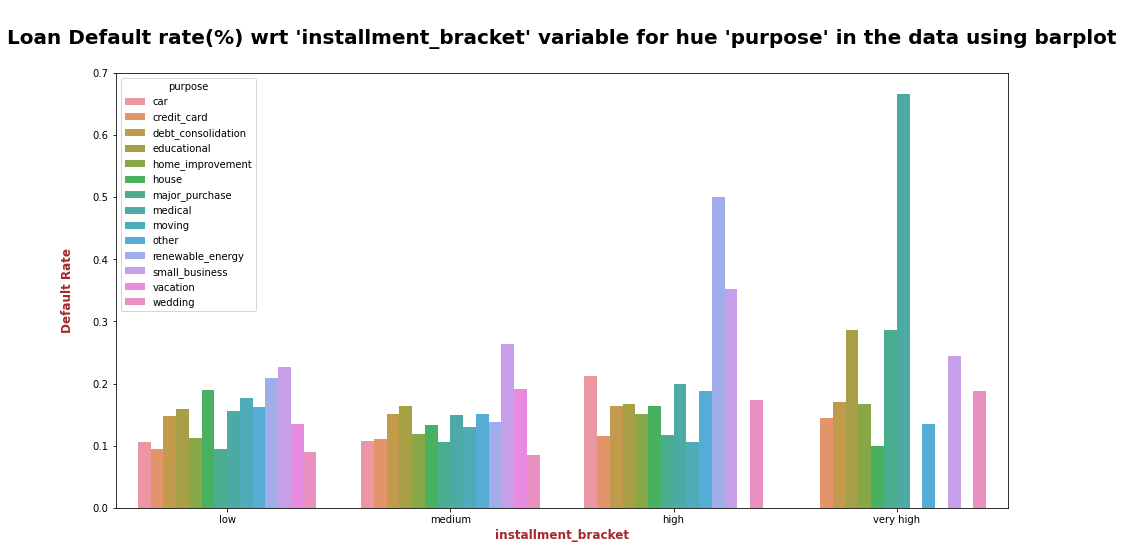

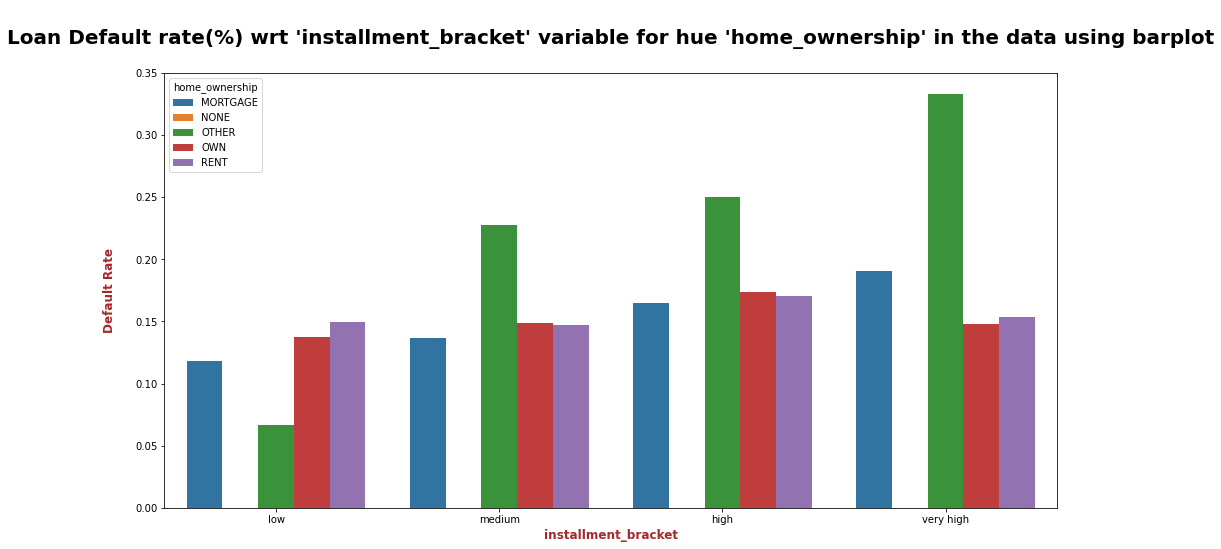

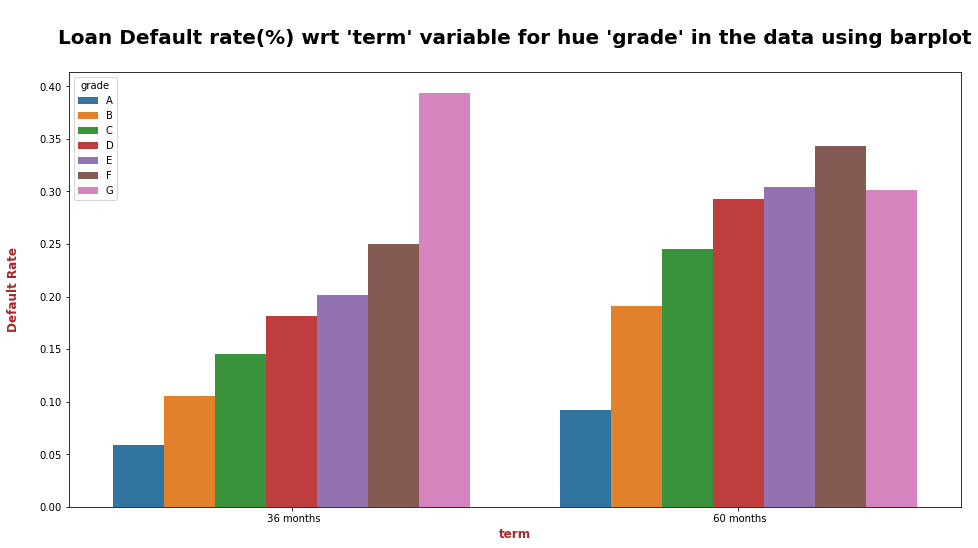

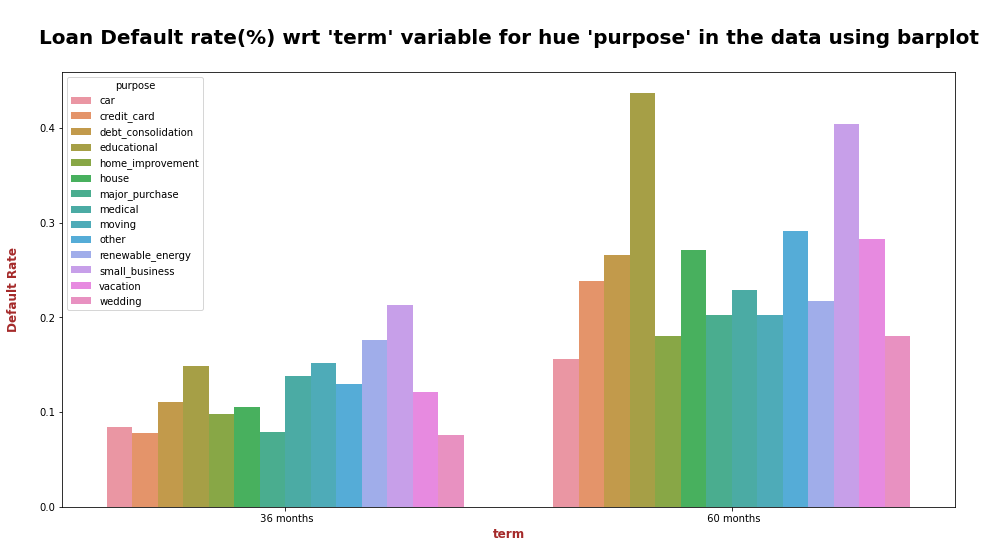

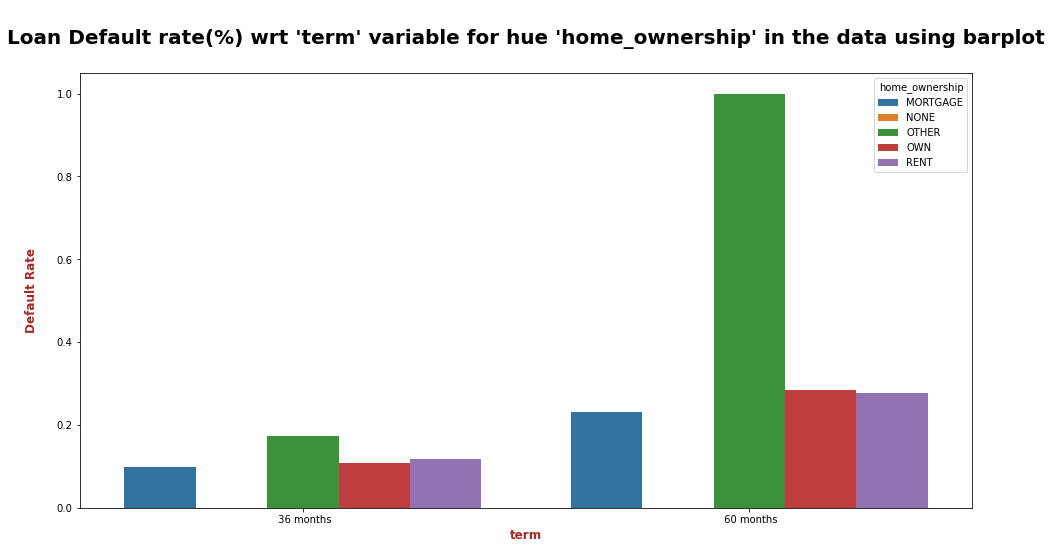

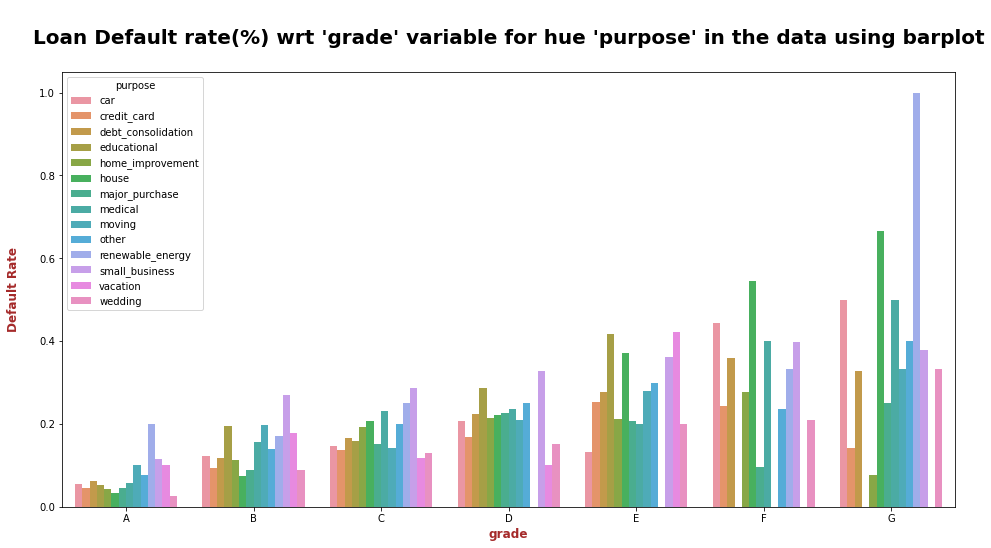

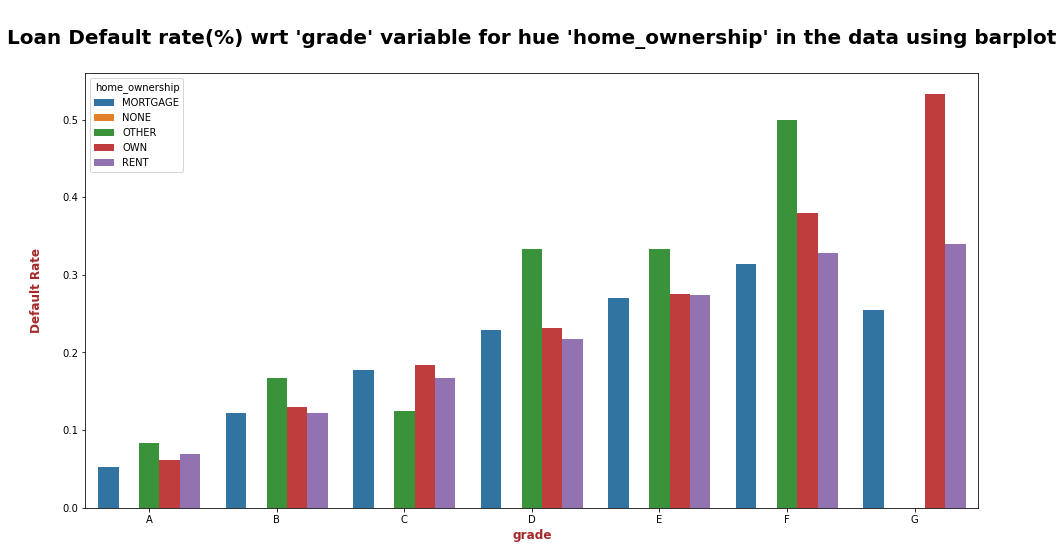

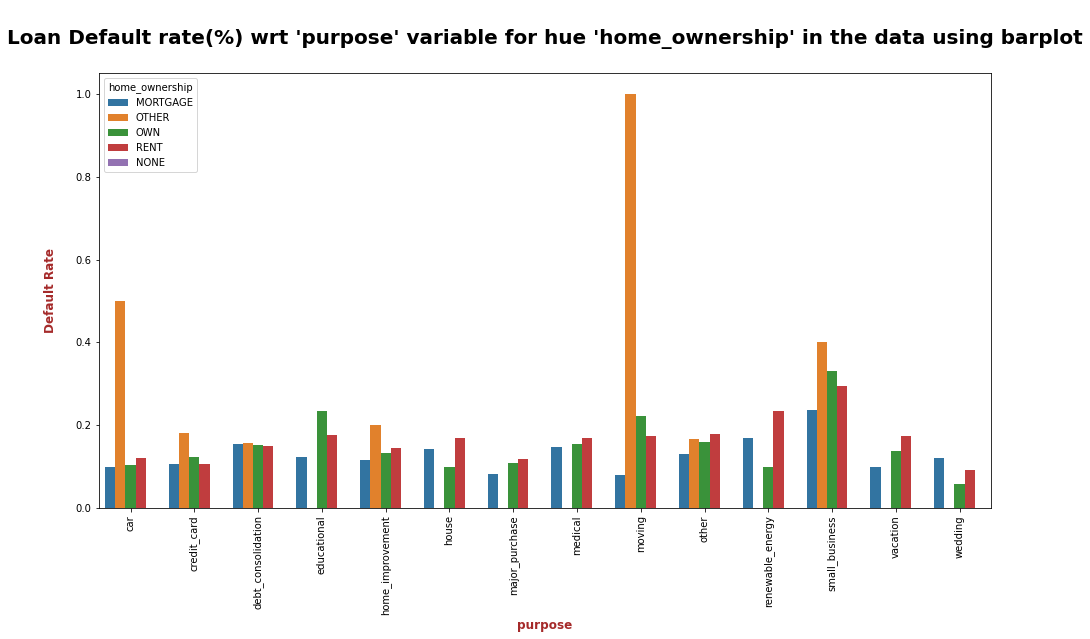

In [252]:
#loop the 2 list of categorical vairables, one containing the default categorical variables that came with the dataset
#second list consists of categorical variables obtained post binning the continuous numeric variables
for r in range(0,len(cat_var_bin)):
    for c in range(0,len(cat_var_def)):
        bar_plot_biv_avg_rate(cat_var_bin[r],cat_var_def[c])

#loop within the default categorical list to draw insights within themselves        
for i in range(0,len(cat_var_def)):
    for j in range(i+1,len(cat_var_def)):
        bar_plot_biv_avg_rate(cat_var_def[i],cat_var_def[j]) 

Let's plot all the above plots in a subplot like a summary to spot any pattern and draw insights

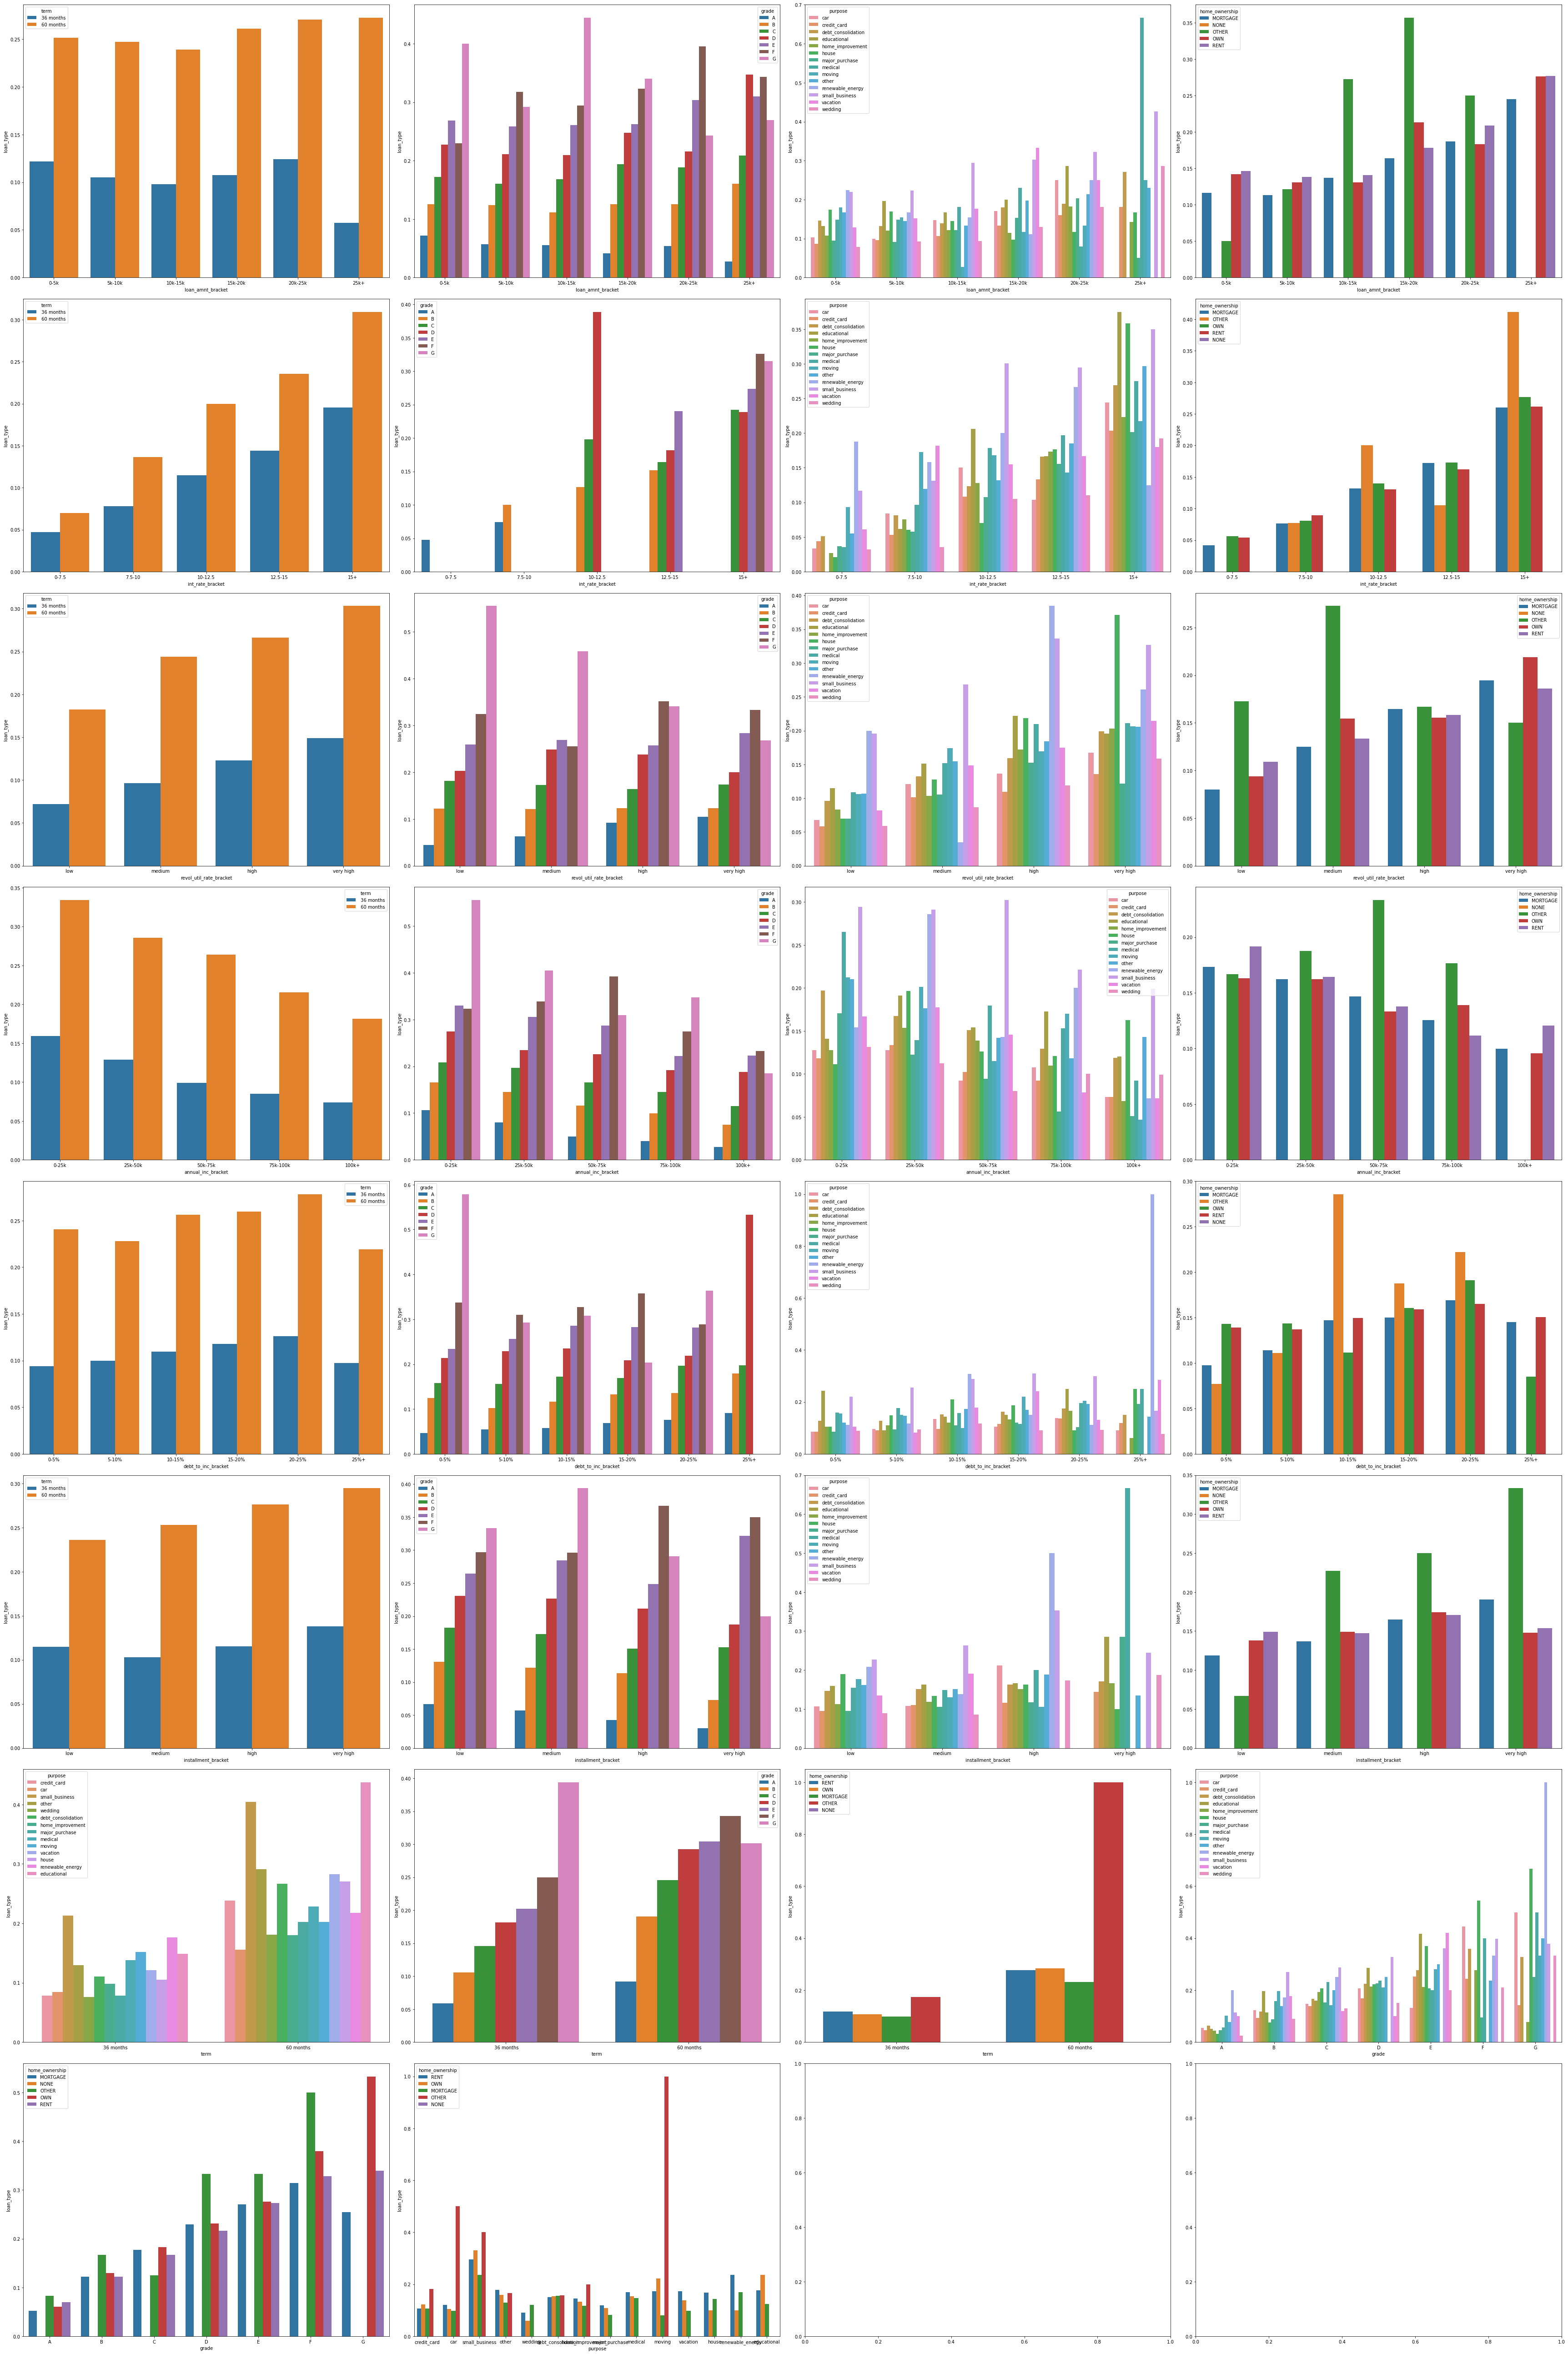

In [253]:
#declare the rows and columns of subplot
nr_rows = 8
nr_cols = 4

#Instantiate the subplot with the number of rows and columns defined
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*12,nr_rows*9))

#loop through the 2 lists to categorical variables to draw insights
for r in range(0,len(cat_var_bin)):
    for c in range(0,len(cat_var_def)):
        data1 = loan.loc[:,[cat_var_bin[r],'loan_type',cat_var_def[c]]].sort_values(['loan_type',cat_var_bin[r],cat_var_def[c]])
        sns.barplot(x=cat_var_bin[r], y='loan_type', hue=cat_var_def[c], data=data1,ax = axs[r][c],ci=None)        

#Manually plot those which are not iterable        
sns.barplot(x='term', y='loan_type', hue='purpose', data=loan,ax = axs[6][0],ci=None)
data1 = loan.loc[:,['term','loan_type','grade']].sort_values(['loan_type','term','grade'])
sns.barplot(x='term', y='loan_type', hue='grade', data=data1,ax = axs[6][1],ci=None) 
sns.barplot(x='term', y='loan_type', hue='home_ownership', data=loan,ax = axs[6][2],ci=None)
data1 = loan.loc[:,['grade','loan_type','purpose']].sort_values(['loan_type','grade','purpose'])
sns.barplot(x='grade', y='loan_type', hue='purpose', data=data1,ax = axs[6][3],ci=None)
data1 = loan.loc[:,['grade','loan_type','home_ownership']].sort_values(['loan_type','grade','home_ownership'])
sns.barplot(x='grade', y='loan_type', hue='home_ownership', data=data1,ax = axs[7][0],ci=None)
sns.barplot(x='purpose', y='loan_type', hue='home_ownership', data=loan,ax = axs[7][1],ci=None)
   
#Show the plots in a tight layout
plt.tight_layout()    
plt.show()

<b>From the above graphs we can draw the following conclusion</b>
1. There is no notable trend seen in default rate risk of loan_amnt across different terms. The corelation of loan_amnt with term doesn't give us much insight apart from the obvious facts that has been observed during univariate analysis against each of these variables.
2. There is no notable trend seen in default rate risk of loan_amnt across different grades. It is note worthy that the default rate of Grade G is higher at lower loan amnt and decreases as the loan amnt increases but the default rate of Grade F is higher as the loan amnt increases. These 2 things need to be kept in mind while handing out loans.
3. We can see that the default rate risk of purpose increases as the loan_amnt increases. It is note worthy that the default rate of medical purpose increases drastically as the loan_amnt increases. 
4. We can observe that the default rate risk of home_ownership (for category rent,own & mortgage) increases as the loan_amnt increases. The default rate of OTHER home_wonership peaks at 15-20k bracket and then diminishes.
5. We can observe that the default rate of term increases as the int_rate increases.
6. We can observe how grade is distributed against the groups of int_rate. Notice that Grade A lies between 0-10% ROI, Grade B lies between 7.5-15% ROI, Grade C and D lie between 10-15+% ROI, Grade E lies between 12.5-15+% ROI and finally Grade F and G lie in 15+% ROI range.
7. We can observe that the default rate of purpose increases as the int_rate increases. It is note worthy that small businesses,renewable energy, educational and hose loans tend to default more with higher rate of interest.
8. We can observe that the default rate risk of home_ownership (for all categories) increases as the loan_amnt increases.
9. We can observe that the default rate of term increases as the revolving untilization rate increases.
10. There is no notable trend seen in default rate risk of revol_util_rate across different grades(A,B,C,D,E,F). It is noteworthy that the default rate of grade G decreases as the revolving utilization rate increases. 
11. We can observe that the default rate of small businesses, medical, house, renewable energy and educationl loans tend to default as the revolving utilization rate increases.
12. We can observe that the default rate risk of home_ownership (for category rent,own & mortgage) increases as the loan_amnt increases. The default rate of OTHER home_wonership peaks at medium bracket and then diminishes.
13. We can observe that as the annual income increases, the default rate of term decreases.
14. We can observe that as the annual income increases, the default rate of grade decreases.
15. We can observe that as the annual income increases, the default rate of purpose decreases.
16. We can observe that as the annual income increases, the default rate of home ownership status (for category rent,own & mortgage) decreases. No notable trend noticed for OTHER home ownership. It is not worthy that default rate of OTHER home_wonership peaks at 50-75k bracket and then diminishes
17. There is no notable trend seen in default rate risk of debt_to_inc across different terms. The corelation of loan_amnt with term doesn't give us much insight apart from the obvious facts that has been observed during univariate analysis against each of these variables.
18. There is no notable trend seen in default rate risk of debt_to_inc across different grades. It is note worthy that the default rate of Grade G is higher at lower debt_to_inc rate and decreases as the debt_to_inc rate increases but the default rate of Grade D peaks at 25+% debt to income rate. These 2 things need to be kept in mind while handing out loans.
19. There is no notable trend seen in default rate risk of debt_to_inc across different purposes. It is note worthy that the default rate of renewable energy is increases as the debt_to_inc rate increases and peaks at 25+% debt to income rate. These needs to be kept in mind while handing out loans.
20. There is no notable trend seen in default rate risk of debt_to_inc across different home ownership. It is note worthy that the default rate of OTHER peaks at 10-15% debt to income rate. This needs to be kept in mind while handing out loans.
21. We can observe that as the installment_bracket for 60 month increases, the default rate of term decreases but no notable change for 30 month loan term.
22. There is no notable trend seen in default rate risk of installment_bracket across different grades. It is noteworthy that the default rate of Grade G is higher at low and medium installment_bracket and the default rate of Grade F is higher at high and very high installment bracket.
23. There is no notable trend seen in default rate risk of installment_bracket across different purpose. Note that the default rate of small business loan peaks at high installment bracket, renewable energy peaks at high installment bracket and medical loan peaks at very high installment bracket.
24. There is no notable trend seen in default rate risk of installment_bracket across rent and own home ownership but the default rate of Mortgage and Other home ownership increases as the installment bracket increases. 
25. We observe that the default rate of purpose,grades and home ownership across all types is more for 60 month loan than that of 36 month.
26. We observe that the default rate of purpose across all types and home ownership across rent and own increases as the grade progresses from A-G. The default rate of mortgage and own increases as the grade progresses from A-F and then diminishes at grade G. Note that the default rate of OWN home ownership status peaks at grade G.
27. No indentifiable trend in default rate of home ownership across purpose. It is noteworty that the default rate of OTHER home ownership peaks over the other home ownership types in car,small business and moving loan types. This needs to be kept in mind while handing out loans

<b>2. Quantitative Variables - Multivariate Analysis</b>



Let's take all the numeric variables post filtering into account to understand if the filtered columns from univariate analysis is justified or not

In [254]:
quant_feat2 = [column for column in loan.drop('loan_type',axis=1).columns if loan[column].dtype in ['int','float','int64']]

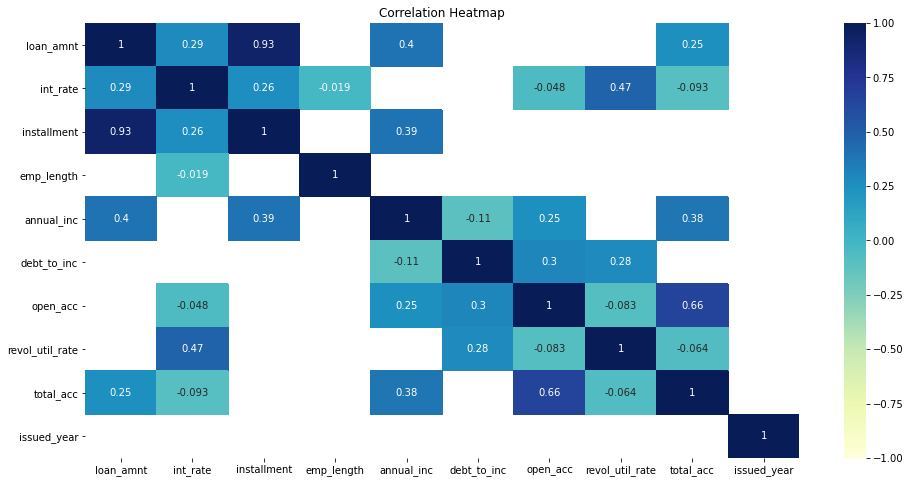

In [255]:
# plot heat map to see correlation between quamtitative features

plt.figure(figsize=[16,8])
loan_corr = loan[quant_feat2].corr()
sns.heatmap(loan_corr[(loan_corr >= 0.25) | (loan_corr < 0)],vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

<b>Inference:</b>
1. As the loan_amnt increases the installments in which the loan is repaid
2. As your installments increase your annual income has to be more to make for the installments
3. As your installments increase your rate of interest will also be impacted
4. The Interest rate will inturm impact debt to income ration
5. The interest rate will also impact your revolving utilization rate

### Bi Variate Analysis Conclusion

The following variables/features where analysed to be impactful for default rate upon performing bivariate analysis:

1. term
2. grade
3. home_ownership
4. puropose
5. loan_amnt
6. int_rate
7. revol_util_rate

## Checkpoint 5: Recommendation

Now that we have a list of driving factors post bivariate analysis, we need to understand which among these factors will affect the default rate the most and help us decide. The spread of information in each of these features should be high for us to distinctively idntify defaulters. 
The way we can calculate this information content for each of these variables is by taking the difference of the maximum value and the minimum value. Higher the difference, higher would the information content will be in that feature. We will be able to make better decisions for features with high information content

Let's start by writing a function for caculating the information content for a given variable:

In [256]:
#function for returing the difference of max default rate and min default rate ina category as info_content_rate for that feature
def info_content_rate(cat_var):
    def_rate = round(pd.pivot_table(data=loan,index=cat_var,values='loan_type',aggfunc=np.mean),2)
    def_rate.reset_index(inplace=True)
    def_rate.rename(columns={'loan_type':'default_rate'},inplace=True)
    return(round(def_rate.default_rate.max()-def_rate.default_rate.min(),2))

Let's create a list of the variables obtained at the end of bivariate analysis and then parse throgh each of the variables to obtain the information content

In [257]:
#List of factors obtained from Bi Variate Analysis
factors = ['term','grade','home_ownership','purpose','loan_amnt_bracket','int_rate_bracket','revol_util_rate_bracket']

#Create a dictionary of factor:info_content_rate
info_content = {}
for category in factors:
    info_content[category] = info_content_rate(category)

In [258]:
#Let's sort the output in descending order of value to get the desired results/better readability
info_content = {k: v for k, v in sorted(info_content.items(), key=lambda item: item[1],reverse=True)}
info_content

{'grade': 0.27,
 'int_rate_bracket': 0.21,
 'home_ownership': 0.18,
 'purpose': 0.17,
 'term': 0.14,
 'loan_amnt_bracket': 0.13,
 'revol_util_rate_bracket': 0.1}

In [261]:
#Represent the top 6 of above data in a data frame format
pd.DataFrame.from_dict(info_content, orient ='index').rename(columns={0:'Information Content'}).head(6)

,Information Content
grade,0.27
int_rate_bracket,0.21
home_ownership,0.18
purpose,0.17
term,0.14
loan_amnt_bracket,0.13


<b> Conclusion:</b>
<br>
The top 5 driving factors for loan default are:
1. <b>Grade/Interest Rate</b> : Higher the grade/interest rate, higher the risk of default
2. <b>Home Ownership</b> : If home ownership is 'OTHER', then higher risk of default
4. <b>Purpose </b>: If purpose is for small businesses,debt consolidation, medical, house, renewable energy and educationl loan, then higher risk of default
4. <b>Term</b> : Higher the term of loan, higher the risk of default
5. <b>Loan Amount</b> : Higher the loan amount, higher is the risk of default

Note: We have grouped Grade with Intrest Rate as we have seen in bivariate analysis how the grades are interrelated to interest rates and how closely co-related they are. Hence we are clubbing them into 1 factor.